In [1]:
import pandas as pd
import dask as dd
import os
import matplotlib.pyplot as plt

# Sem bleed

In [3]:
file_path = "../../../../Exploração/Datasets/06120018/TCRF_ARCHIVE_06120018_20220523142237.parquet"

df_sem_bleed = pd.read_parquet(file_path, engine='pyarrow')
df_sem_bleed=df_sem_bleed.fillna(method='ffill')
df_sem_bleed=df_sem_bleed.fillna(method='bfill')
df_sem_bleed['message0418DAA-1'].unique(), df_sem_bleed['message0422DAA-1'].unique()

(array([0.]), array([0.]))

In [4]:
# Lista de colunas dos sensores
sensor_columns = [
    'amscHprsovDrivF-1a', 'amscHprsovDrivF-1b', 'amscHprsovDrivF-2b', 
    'amscPrsovDrivF-1a', 'amscPrsovDrivF-1b', 'amscPrsovDrivF-2b', 
    'basBleedLowPressF-1a', 'basBleedLowPressF-2b', 'basBleedLowTempF-1a', 
    'basBleedLowTempF-2b', 'basBleedOverPressF-1a', 'basBleedOverPressF-2b', 
    'basBleedOverTempF-1a', 'basBleedOverTempF-2b', 'bleedFavTmCmd-1a', 
    'bleedFavTmCmd-1b', 'bleedFavTmCmd-2a', 'bleedFavTmCmd-2b', 
    'bleedFavTmFbk-1a', 'bleedFavTmFbk-1b', 'bleedFavTmFbk-2b', 
    'bleedHprsovCmdStatus-1a', 'bleedHprsovCmdStatus-1b', 'bleedHprsovCmdStatus-2a', 
    'bleedHprsovCmdStatus-2b', 'bleedHprsovOpPosStatus-1a', 'bleedHprsovOpPosStatus-1b', 
    'bleedHprsovOpPosStatus-2a', 'bleedHprsovOpPosStatus-2b', 'bleedMonPress-1a', 
    'bleedMonPress-1b', 'bleedMonPress-2a', 'bleedMonPress-2b', 'bleedOnStatus-1a', 
    'bleedOnStatus-1b', 'bleedOnStatus-2b', 'bleedOverpressCas-2a', 
    'bleedOverpressCas-2b', 'bleedPrecoolDiffPress-1a', 'bleedPrecoolDiffPress-1b', 
    'bleedPrecoolDiffPress-2a', 'bleedPrecoolDiffPress-2b', 'bleedPrsovClPosStatus-1a', 
    'bleedPrsovClPosStatus-2a', 'bleedPrsovFbk-1a'
]

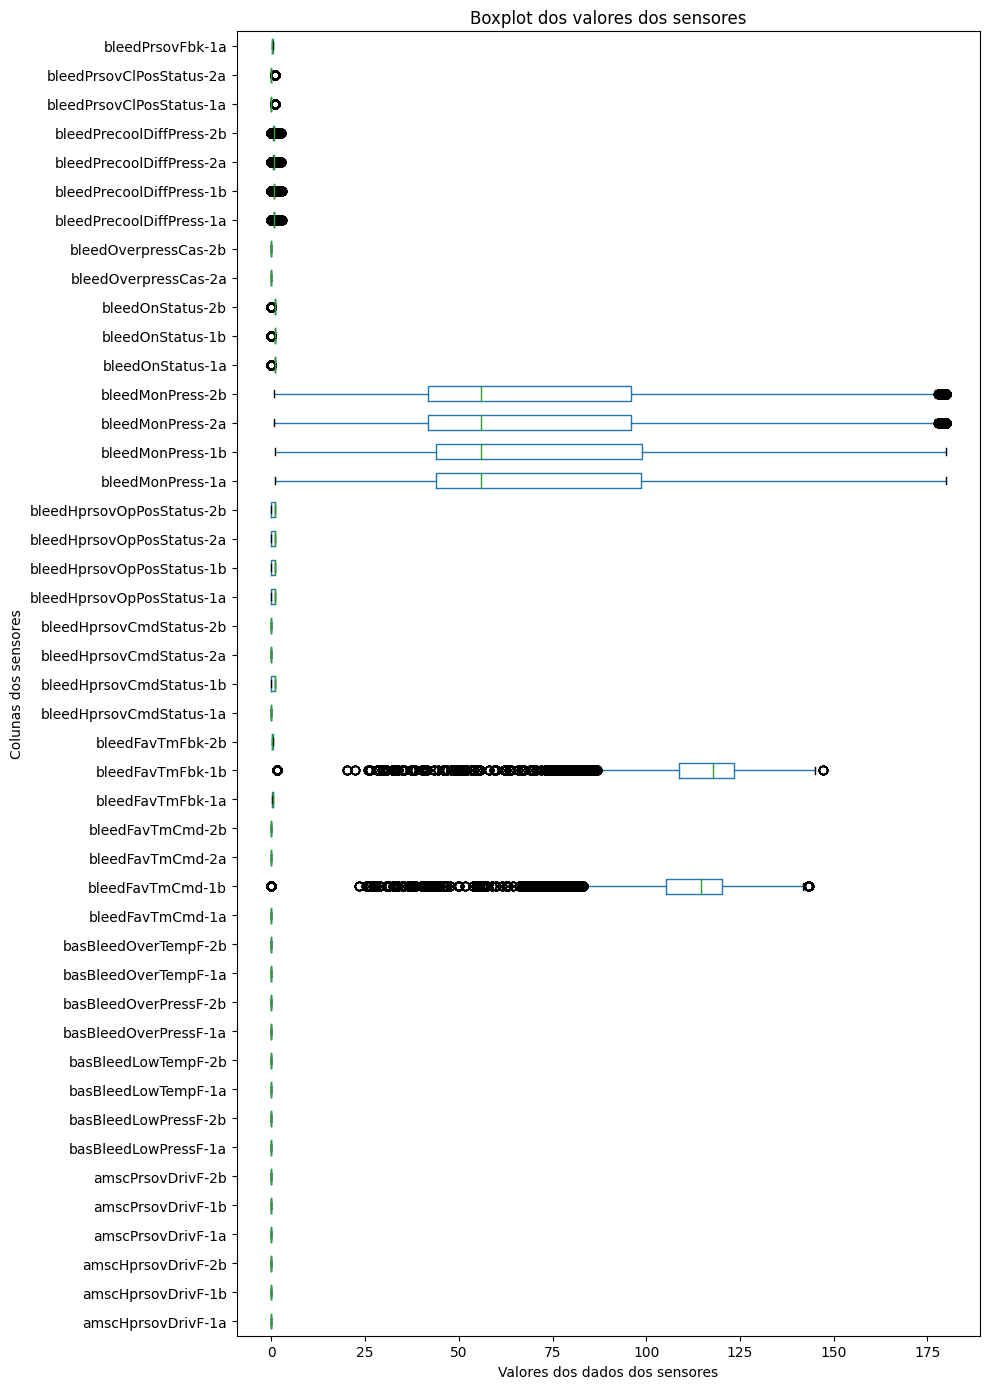

In [5]:
# Criar o boxplot para as colunas de sensores
ax1 = df_sem_bleed[sensor_columns].boxplot(grid=False, vert=False, fontsize=10, figsize=(10,14))

# Configurar os rótulos e o título
ax1.set_xlabel('Valores dos dados dos sensores')
ax1.set_ylabel('Colunas dos sensores')
ax1.set_title('Boxplot dos valores dos sensores')

# Mostrar o gráfico
plt.tight_layout()
plt.savefig("boxplot_sensores.png", dpi=300, bbox_inches='tight')

plt.show()

## Vâriações de acordo com o tempo

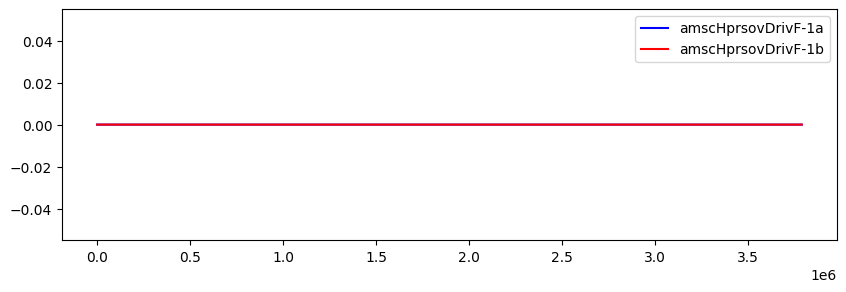

amscHprsovDrivF-1a: 0.0, amscHprsovDrivF-1b: 0.0


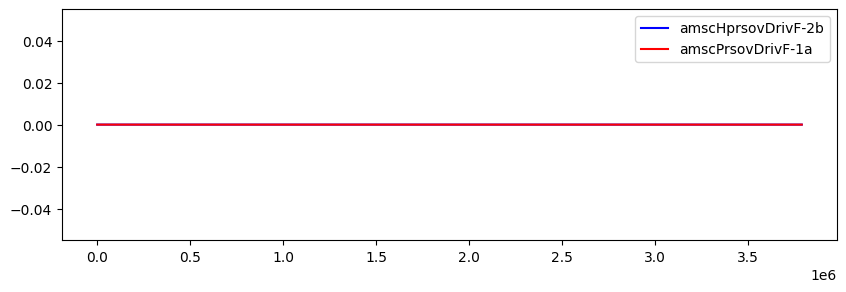

amscHprsovDrivF-2b: 0.0, amscPrsovDrivF-1a: 0.0


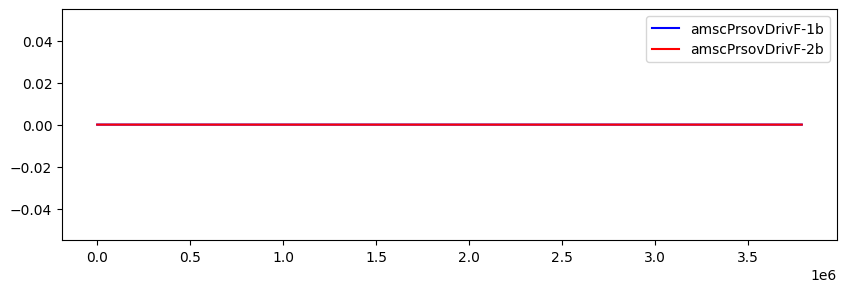

amscPrsovDrivF-1b: 0.0, amscPrsovDrivF-2b: 0.0


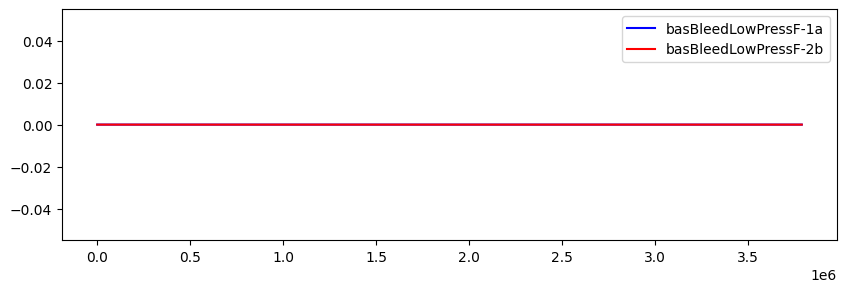

basBleedLowPressF-1a: 0.0, basBleedLowPressF-2b: 0.0


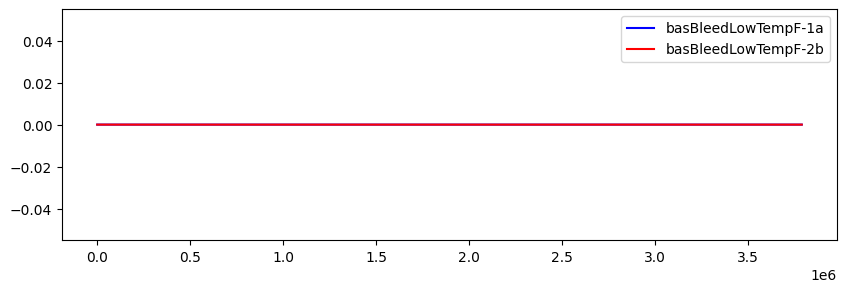

basBleedLowTempF-1a: 0.0, basBleedLowTempF-2b: 0.0


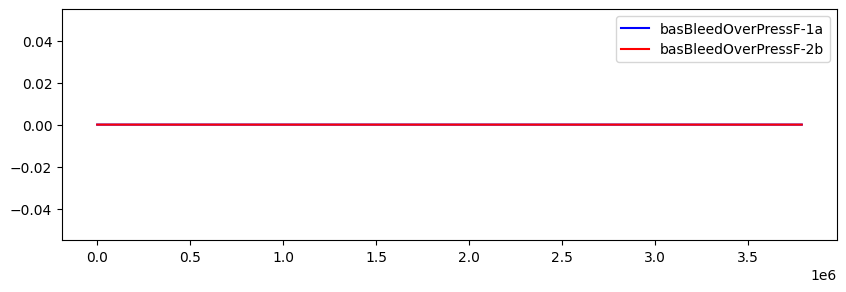

basBleedOverPressF-1a: 0.0, basBleedOverPressF-2b: 0.0


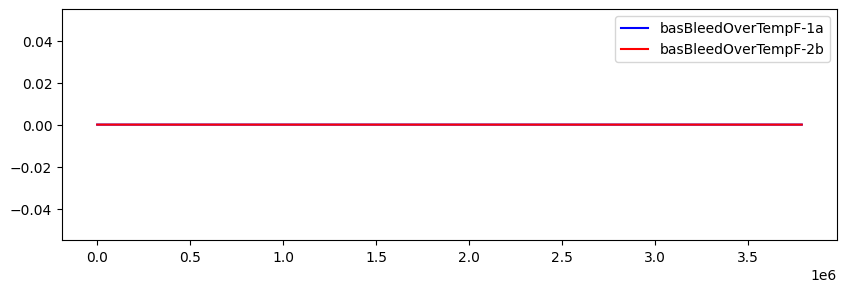

basBleedOverTempF-1a: 0.0, basBleedOverTempF-2b: 0.0


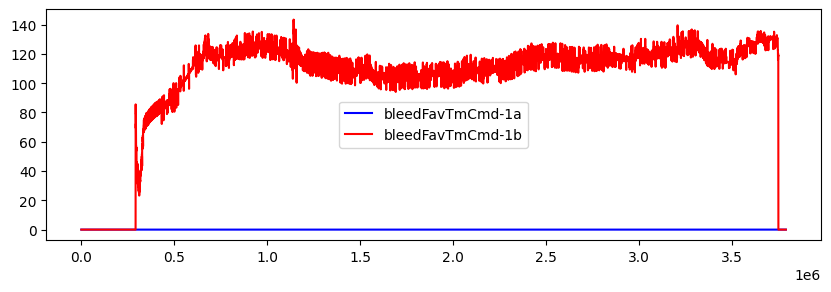

bleedFavTmCmd-1a: 0.0, bleedFavTmCmd-1b: 1189.183150263846


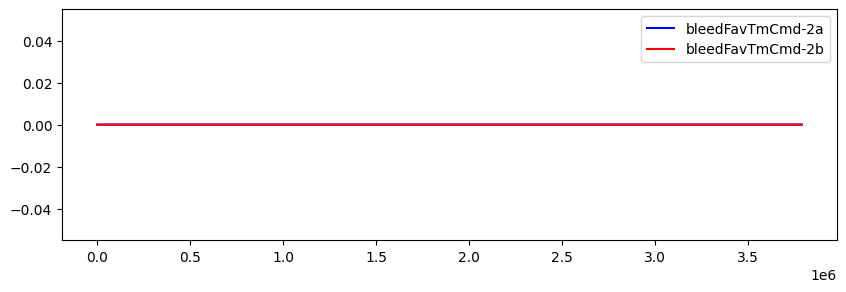

bleedFavTmCmd-2a: 0.0, bleedFavTmCmd-2b: 0.0


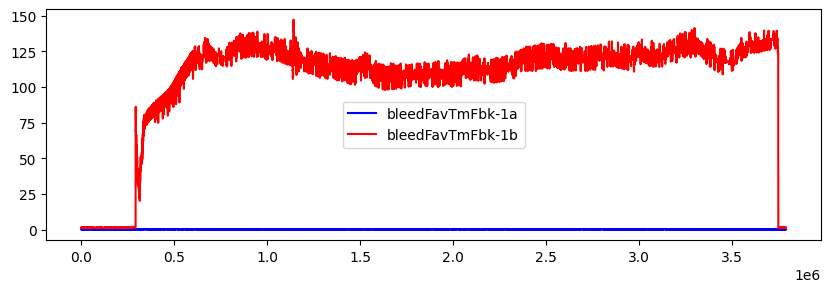

bleedFavTmFbk-1a: 0.004323625144705416, bleedFavTmFbk-1b: 1220.892105913049


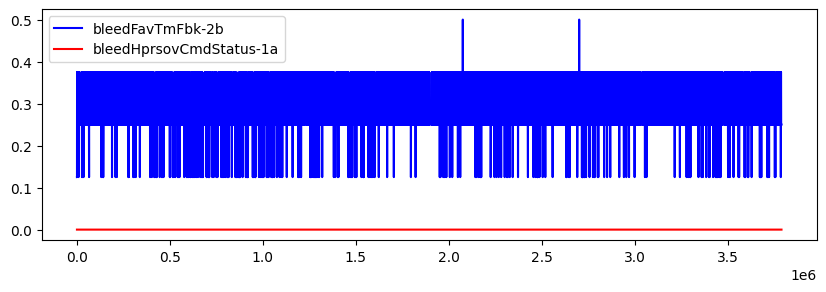

bleedFavTmFbk-2b: 0.0038516294755129646, bleedHprsovCmdStatus-1a: 0.0


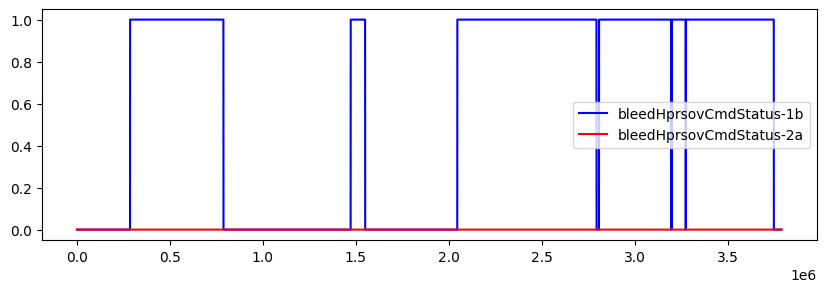

bleedHprsovCmdStatus-1b: 0.24056408827274212, bleedHprsovCmdStatus-2a: 0.0


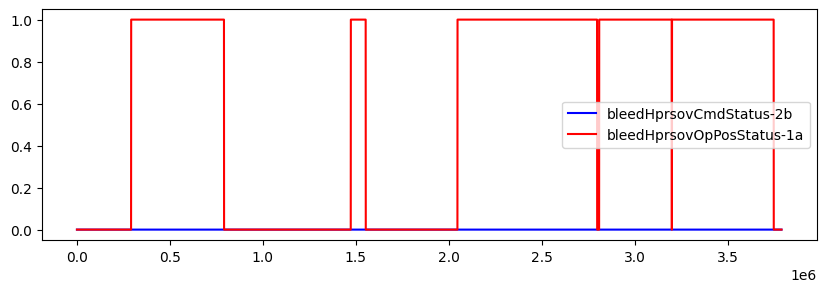

bleedHprsovCmdStatus-2b: 0.0, bleedHprsovOpPosStatus-1a: 0.24028513091590561


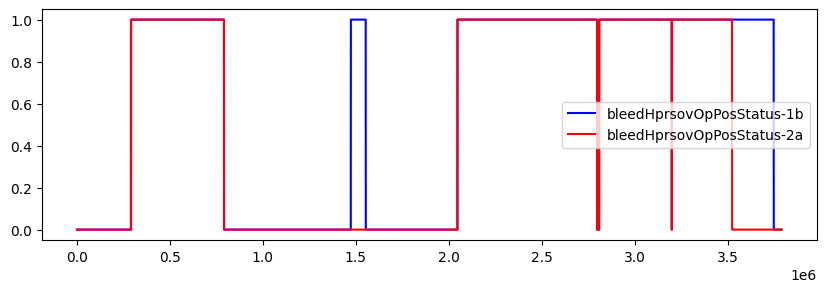

bleedHprsovOpPosStatus-1b: 0.24029033370941874, bleedHprsovOpPosStatus-2a: 0.24964994505409135


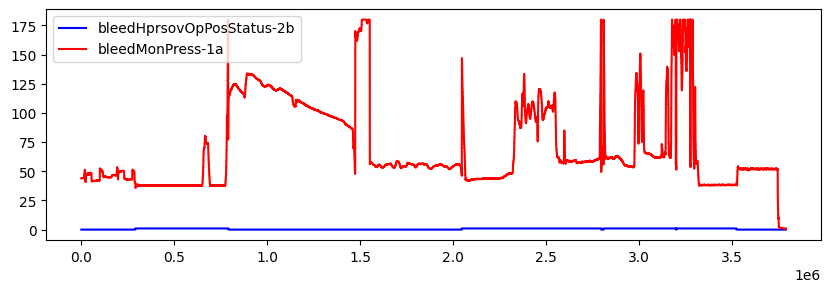

bleedHprsovOpPosStatus-2b: 0.24964994505409138, bleedMonPress-1a: 1363.362317171934


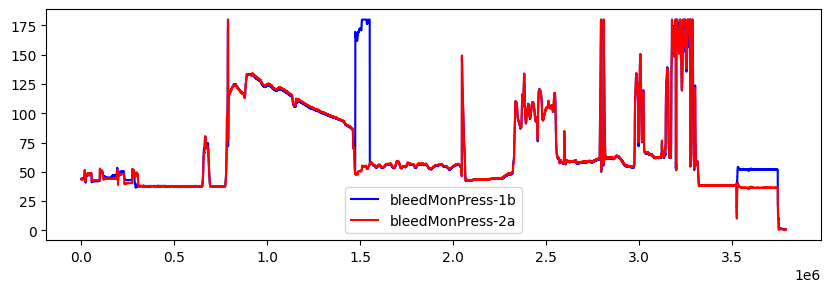

bleedMonPress-1b: 1360.1745351563052, bleedMonPress-2a: 1199.700084774387


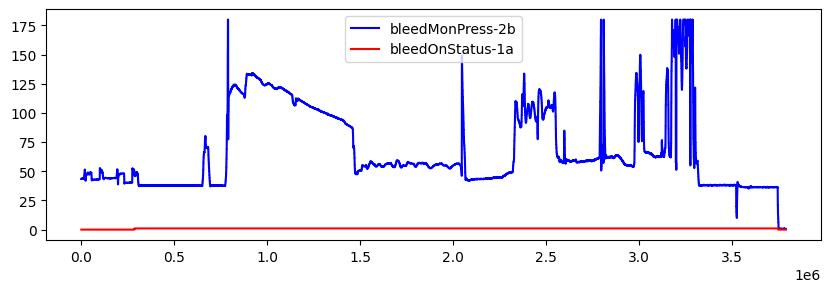

bleedMonPress-2b: 1198.757484536259, bleedOnStatus-1a: 0.07886535734932226


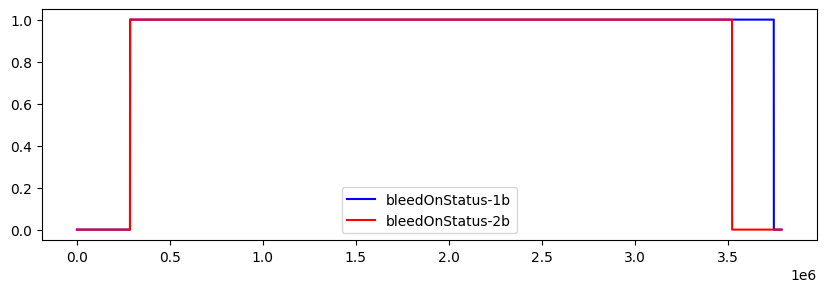

bleedOnStatus-1b: 0.07886535734932229, bleedOnStatus-2b: 0.12431141006956786


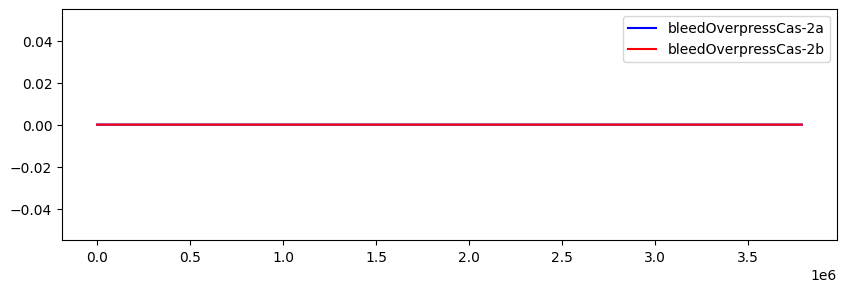

bleedOverpressCas-2a: 0.0, bleedOverpressCas-2b: 0.0


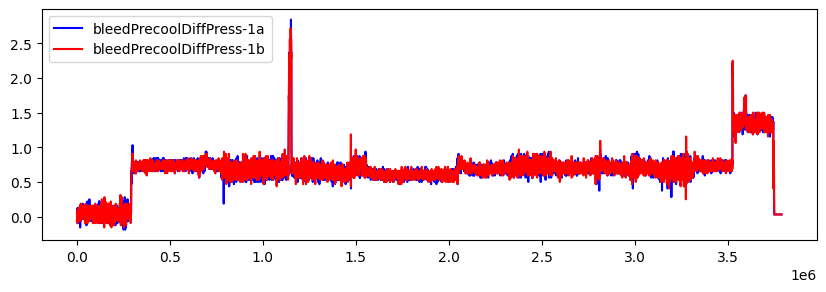

bleedPrecoolDiffPress-1a: 0.07927208943842592, bleedPrecoolDiffPress-1b: 0.07936719041250996


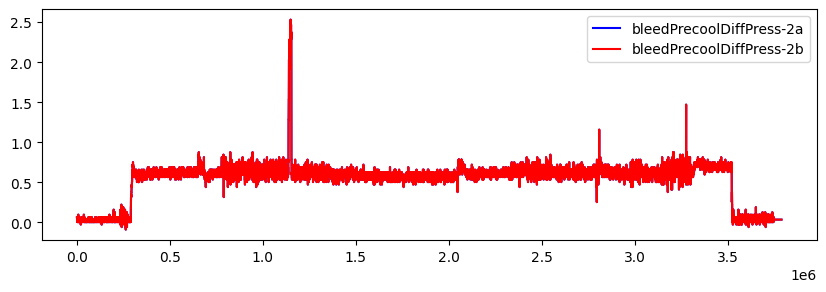

bleedPrecoolDiffPress-2a: 0.05826199596023993, bleedPrecoolDiffPress-2b: 0.05826293264248535


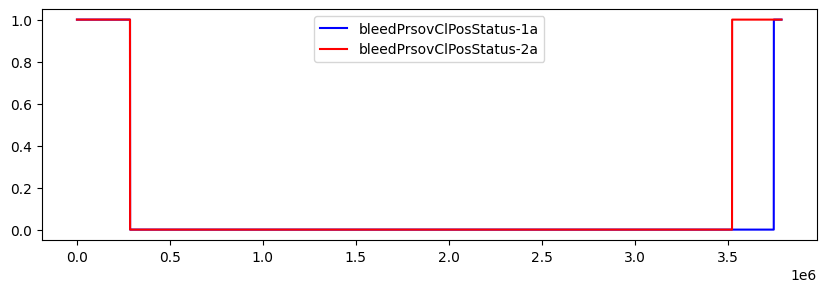

bleedPrsovClPosStatus-1a: 0.07886535734932228, bleedPrsovClPosStatus-2a: 0.12433012292171704


In [6]:
for i,j in zip(sensor_columns[::2], sensor_columns[1::2]):
    y_a = df_sem_bleed[i]
    y_b = df_sem_bleed[j]
    x = df_sem_bleed['recording_time']

    plt.figure(figsize=(10,3))

    plt.plot(x,y_a, label = i, color="blue")
    plt.plot(x,y_b, label = j, color="red")
    plt.legend()
    plt.show()
    print(f'{i}: {y_a.var()}, {j}: {y_b.var()}')

In [7]:
# Lista de colunas dos sensores
sensor_columns = [
    'amscHprsovDrivF-2b','amscPrsovDrivF-1a', 'amscPrsovDrivF-1b', 'amscPrsovDrivF-2b', 
    'basBleedLowPressF-1a', 'basBleedLowPressF-2b', 'basBleedLowTempF-1a', 
    'basBleedLowTempF-2b', 'basBleedOverPressF-1a', 'basBleedOverPressF-2b', 
    'basBleedOverTempF-1a', 'basBleedOverTempF-2b', 'bleedFavTmCmd-1a', 
    'bleedFavTmCmd-1b', 'bleedFavTmCmd-2a', 'bleedFavTmCmd-2b', 
    'bleedFavTmFbk-1a', 'bleedFavTmFbk-1b', 'bleedFavTmFbk-2b', 
    'bleedHprsovCmdStatus-1a', 'bleedHprsovCmdStatus-1b', 'bleedHprsovCmdStatus-2a', 
    'bleedHprsovCmdStatus-2b', 'bleedHprsovOpPosStatus-1a', 'bleedHprsovOpPosStatus-1b', 
    'bleedHprsovOpPosStatus-2a', 'bleedHprsovOpPosStatus-2b', 'bleedMonPress-1a', 
    'bleedMonPress-1b', 'bleedMonPress-2a', 'bleedMonPress-2b', 'bleedOnStatus-1a', 
    'bleedOnStatus-1b', 'bleedOnStatus-2b', 'bleedOverpressCas-2a', 
    'bleedOverpressCas-2b', 'bleedPrecoolDiffPress-1a', 'bleedPrecoolDiffPress-1b', 
    'bleedPrecoolDiffPress-2a', 'bleedPrecoolDiffPress-2b', 'bleedPrsovClPosStatus-1a', 
    'bleedPrsovClPosStatus-2a', 'bleedPrsovFbk-1a'
]

# Com bleed

In [8]:
file_path = "../../../../Exploração/Datasets/06120018/TCRF_ARCHIVE_06120018_20220613150340.parquet"

df_com_bleed = pd.read_parquet(file_path, engine='pyarrow')
df_com_bleed=df_com_bleed.fillna(method='ffill')
df_com_bleed=df_com_bleed.fillna(method='bfill')
df_com_bleed['message0418DAA-1'].unique(), df_com_bleed['message0422DAA-1'].unique()

(array([0., 5., 7.]), array([0.]))

In [9]:
# Lista de colunas dos sensores
sensor_columns = [
    'amscHprsovDrivF-1a', 'amscHprsovDrivF-1b', 'amscHprsovDrivF-2b', 
    'amscPrsovDrivF-1a', 'amscPrsovDrivF-1b', 'amscPrsovDrivF-2b', 
    'basBleedLowPressF-1a', 'basBleedLowPressF-2b', 'basBleedLowTempF-1a', 
    'basBleedLowTempF-2b', 'basBleedOverPressF-1a', 'basBleedOverPressF-2b', 
    'basBleedOverTempF-1a', 'basBleedOverTempF-2b', 'bleedFavTmCmd-1a', 
    'bleedFavTmCmd-1b', 'bleedFavTmCmd-2a', 'bleedFavTmCmd-2b', 
    'bleedFavTmFbk-1a', 'bleedFavTmFbk-1b', 'bleedFavTmFbk-2b', 
    'bleedHprsovCmdStatus-1a', 'bleedHprsovCmdStatus-1b', 'bleedHprsovCmdStatus-2a', 
    'bleedHprsovCmdStatus-2b', 'bleedHprsovOpPosStatus-1a', 'bleedHprsovOpPosStatus-1b', 
    'bleedHprsovOpPosStatus-2a', 'bleedHprsovOpPosStatus-2b', 'bleedMonPress-1a', 
    'bleedMonPress-1b', 'bleedMonPress-2a', 'bleedMonPress-2b', 'bleedOnStatus-1a', 
    'bleedOnStatus-1b', 'bleedOnStatus-2b', 'bleedOverpressCas-2a', 
    'bleedOverpressCas-2b', 'bleedPrecoolDiffPress-1a', 'bleedPrecoolDiffPress-1b', 
    'bleedPrecoolDiffPress-2a', 'bleedPrecoolDiffPress-2b', 'bleedPrsovClPosStatus-1a', 
    'bleedPrsovClPosStatus-2a', 'bleedPrsovFbk-1a'
]

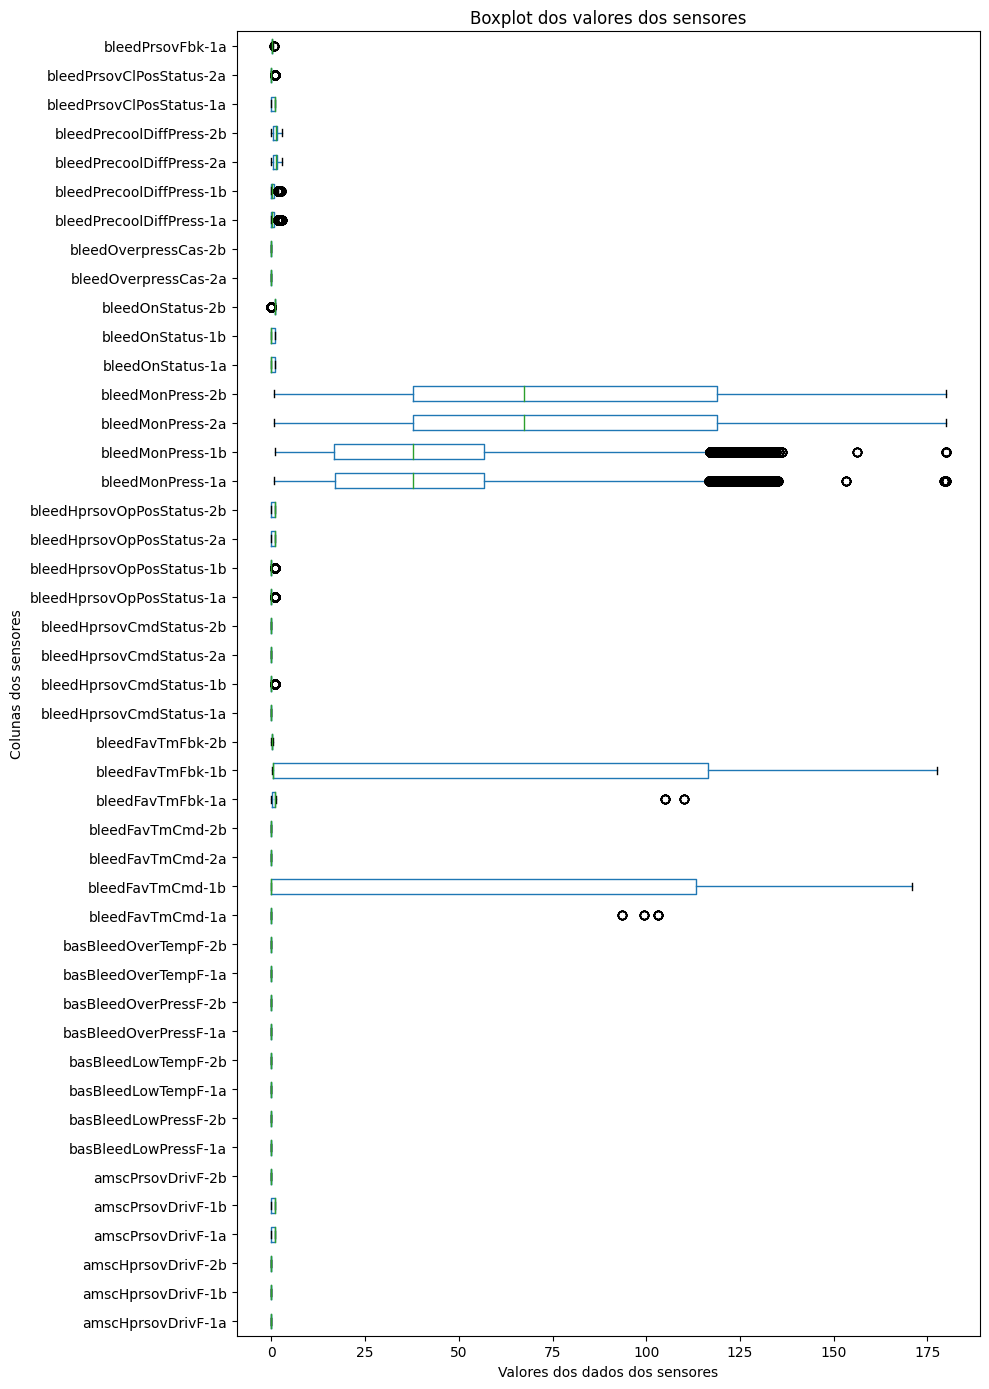

In [10]:
# Criar o boxplot para as colunas de sensores
ax1 = df_com_bleed[sensor_columns].boxplot(grid=False, vert=False, fontsize=10, figsize=(10,14))

# Configurar os rótulos e o título
ax1.set_xlabel('Valores dos dados dos sensores')
ax1.set_ylabel('Colunas dos sensores')
ax1.set_title('Boxplot dos valores dos sensores')

# Mostrar o gráfico
plt.tight_layout()
plt.savefig("boxplot_sensores.png", dpi=300, bbox_inches='tight')

plt.show()

## Variação de acordo com tempo de colunas gêmeas

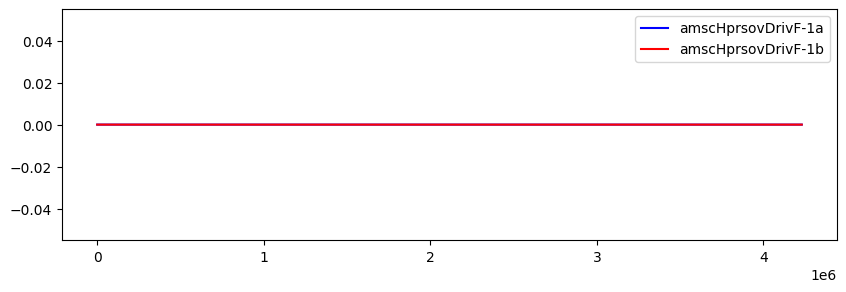

amscHprsovDrivF-1a: 0.0, amscHprsovDrivF-1b: 0.0


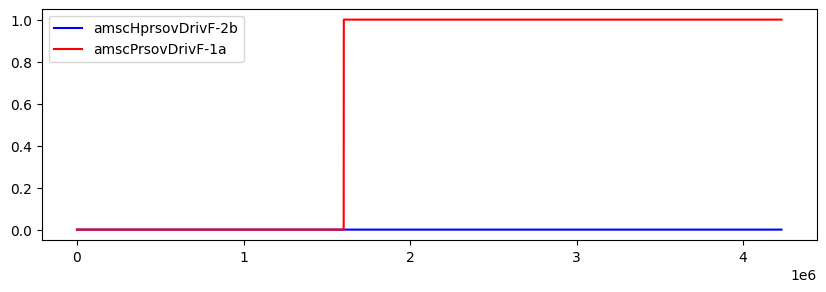

amscHprsovDrivF-2b: 0.0, amscPrsovDrivF-1a: 0.23526499709119902


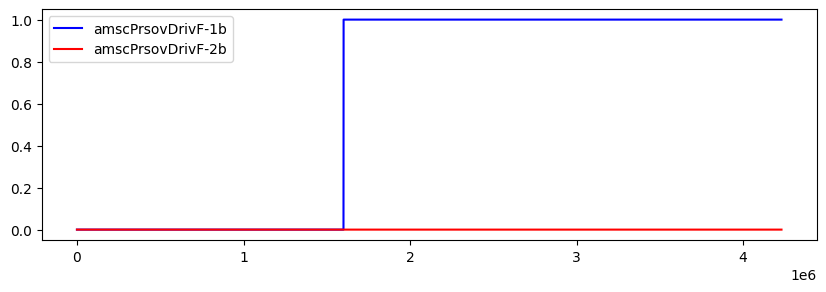

amscPrsovDrivF-1b: 0.23519603759245555, amscPrsovDrivF-2b: 0.0


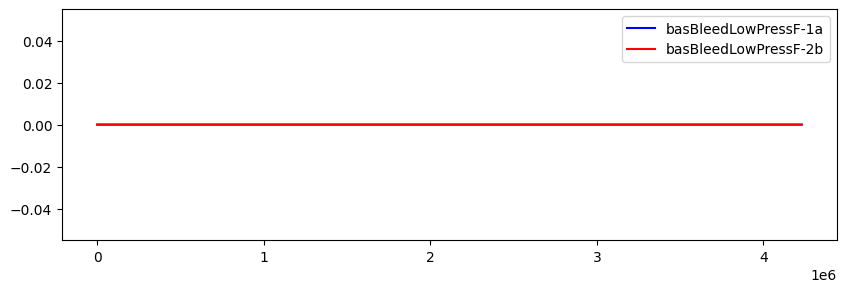

basBleedLowPressF-1a: 0.0, basBleedLowPressF-2b: 0.0


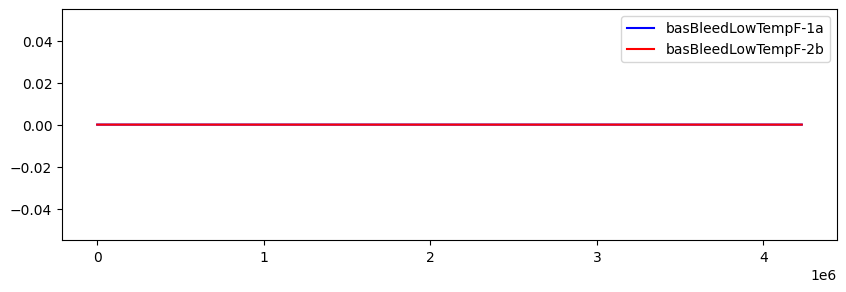

basBleedLowTempF-1a: 0.0, basBleedLowTempF-2b: 0.0


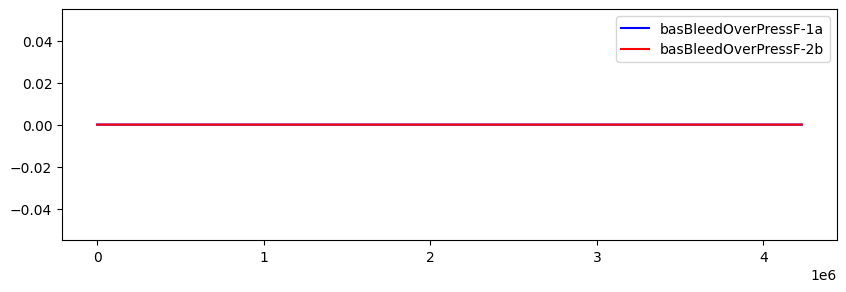

basBleedOverPressF-1a: 0.0, basBleedOverPressF-2b: 0.0


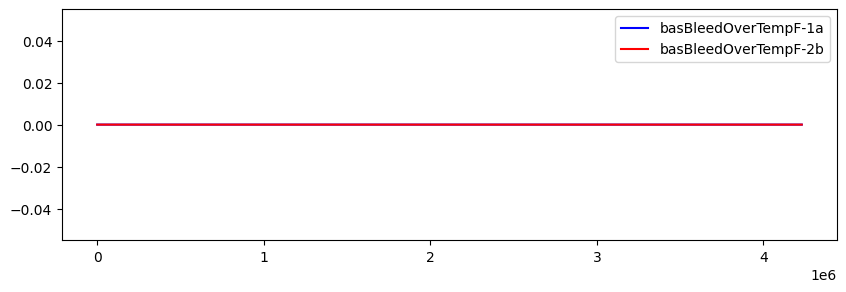

basBleedOverTempF-1a: 0.0, basBleedOverTempF-2b: 0.0


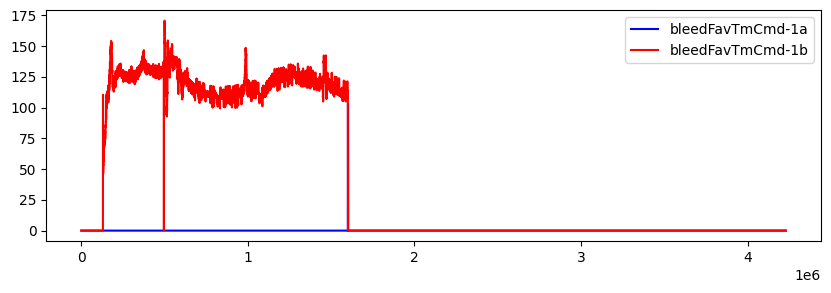

bleedFavTmCmd-1a: 3.2666270547746836, bleedFavTmCmd-1b: 3340.084464681793


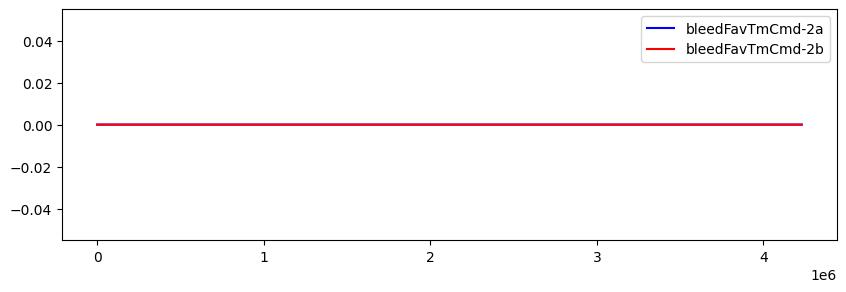

bleedFavTmCmd-2a: 0.0, bleedFavTmCmd-2b: 0.0


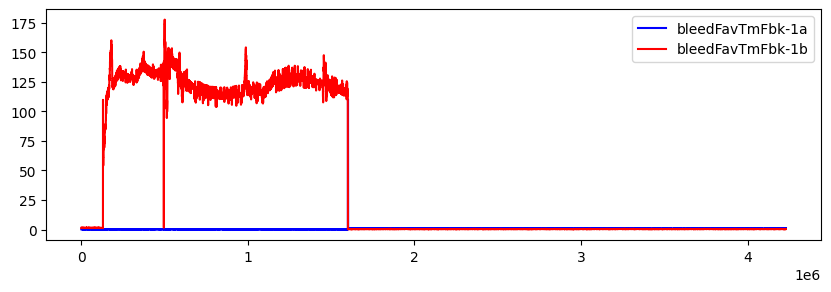

bleedFavTmFbk-1a: 2.837285035300105, bleedFavTmFbk-1b: 3489.1821912566743


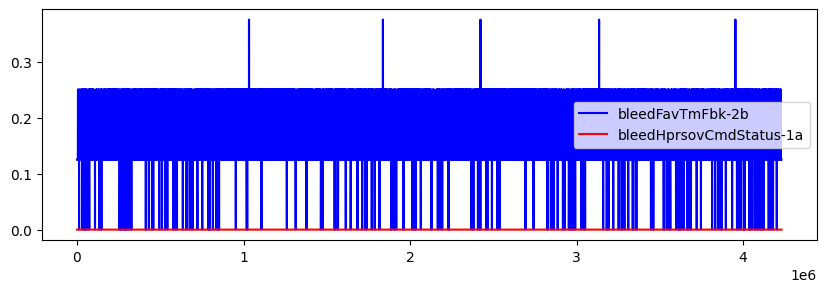

bleedFavTmFbk-2b: 0.004018928959581736, bleedHprsovCmdStatus-1a: 0.0


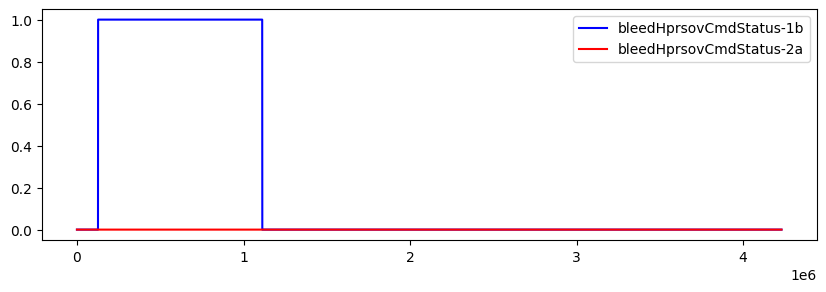

bleedHprsovCmdStatus-1b: 0.17874446096197408, bleedHprsovCmdStatus-2a: 0.0


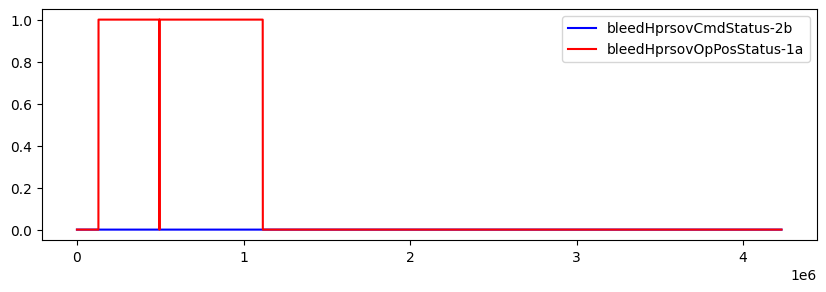

bleedHprsovCmdStatus-2b: 0.0, bleedHprsovOpPosStatus-1a: 0.17875708174064645


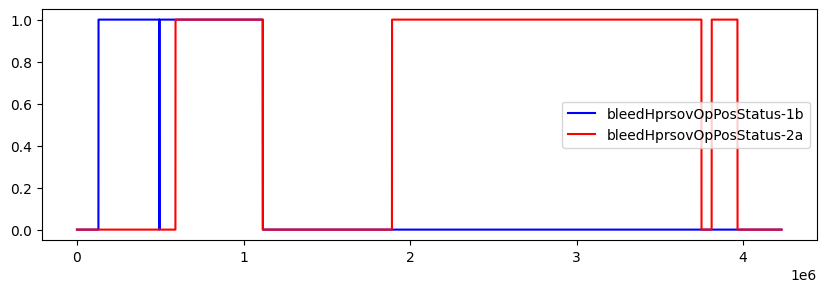

bleedHprsovOpPosStatus-1b: 0.17876970140157006, bleedHprsovOpPosStatus-2a: 0.24003968231014494


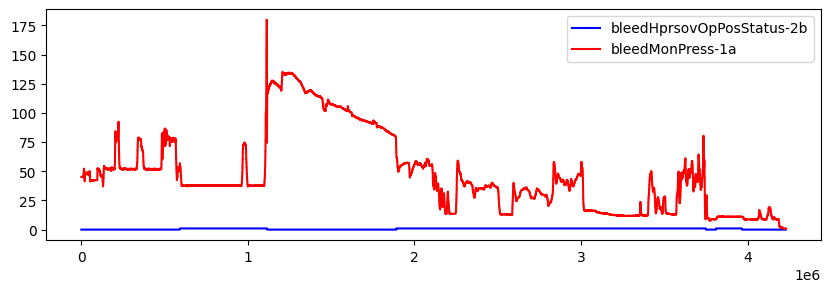

bleedHprsovOpPosStatus-2b: 0.24003496233732186, bleedMonPress-1a: 1155.940766645436


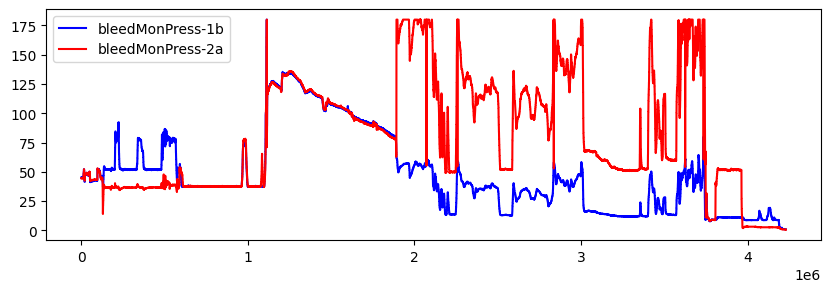

bleedMonPress-1b: 1155.9157114380562, bleedMonPress-2a: 2391.9556824305814


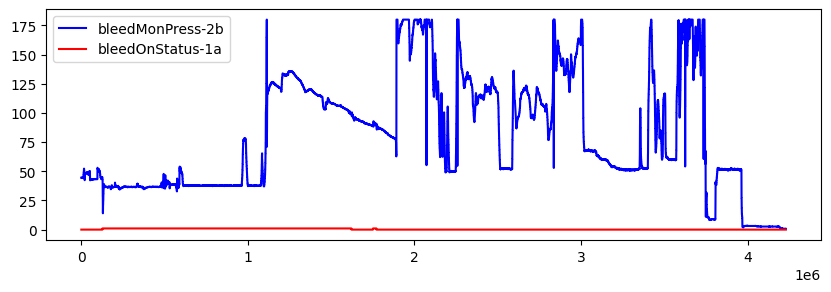

bleedMonPress-2b: 2391.793468241164, bleedOnStatus-1a: 0.22993877112988426


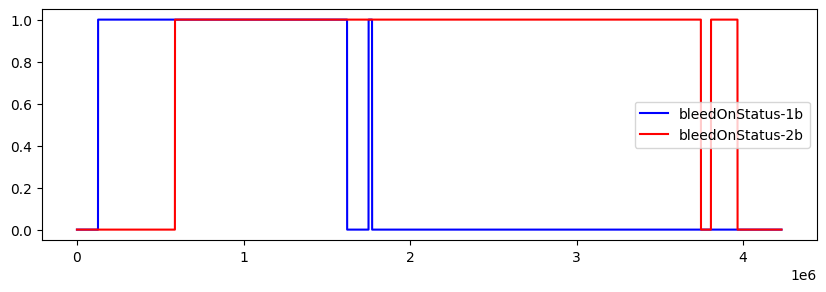

bleedOnStatus-1b: 0.22997224350834666, bleedOnStatus-2b: 0.16923306044340028


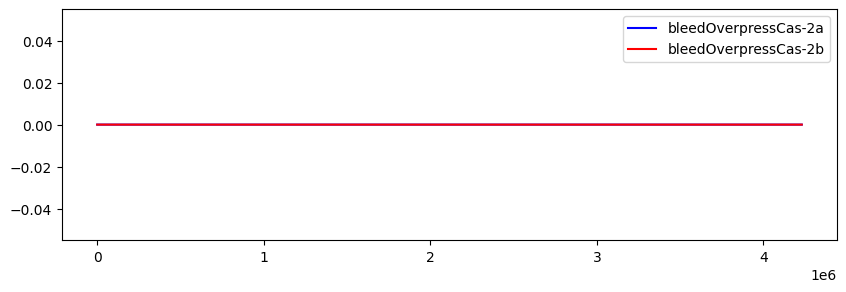

bleedOverpressCas-2a: 0.0, bleedOverpressCas-2b: 0.0


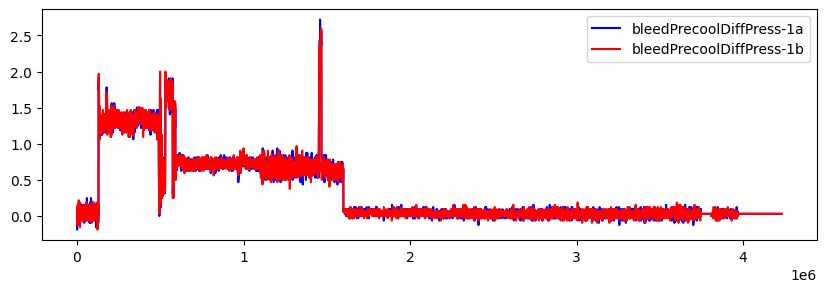

bleedPrecoolDiffPress-1a: 0.21670592260293722, bleedPrecoolDiffPress-1b: 0.21701121128286574


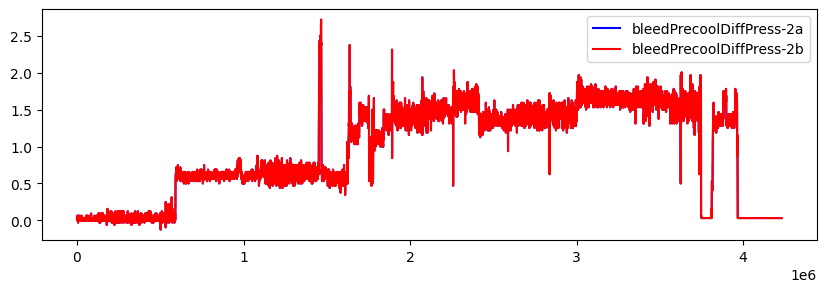

bleedPrecoolDiffPress-2a: 0.38662400389139023, bleedPrecoolDiffPress-2b: 0.38672246174504604


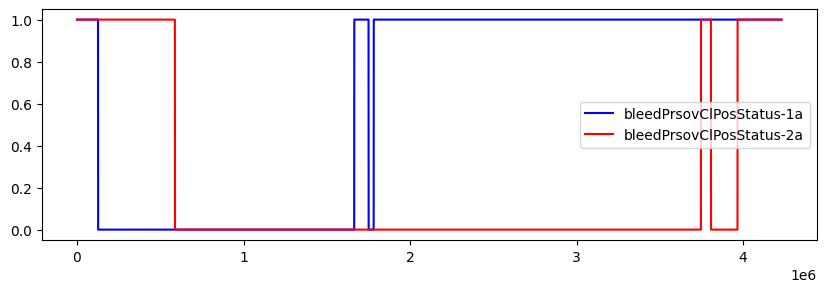

bleedPrsovClPosStatus-1a: 0.23333133647549223, bleedPrsovClPosStatus-2a: 0.1692061836198808


In [11]:
for i,j in zip(sensor_columns[::2], sensor_columns[1::2]):
    y_a = df_com_bleed[i]
    y_b = df_com_bleed[j]
    x = df_com_bleed['recording_time']

    plt.figure(figsize=(10,3))

    plt.plot(x,y_a, label = i, color="blue")
    plt.plot(x,y_b, label = j, color="red")
    plt.legend()
    plt.show()
    print(f'{i}: {y_a.var()}, {j}: {y_b.var()}')

# Comparando bleed com sem bleed


In [12]:
df_com_bleed_reduzido = df_com_bleed.iloc[:len(df_sem_bleed)]

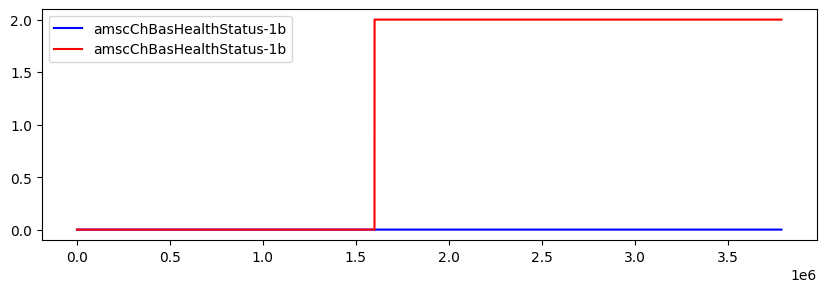

amscChBasHealthStatus-1b: 0.0, amscChBasHealthStatus-1b: 0.9758611228382055


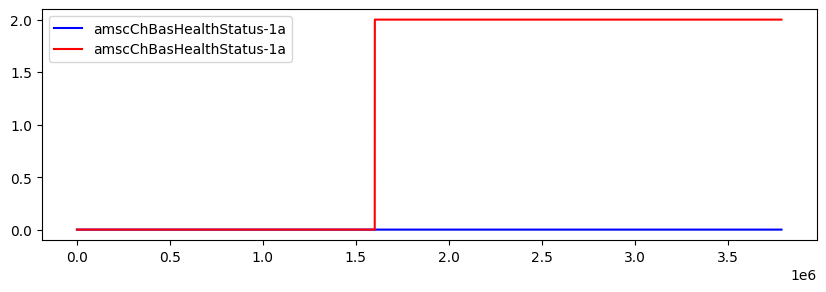

amscChBasHealthStatus-1a: 0.0, amscChBasHealthStatus-1a: 0.9760902644658407


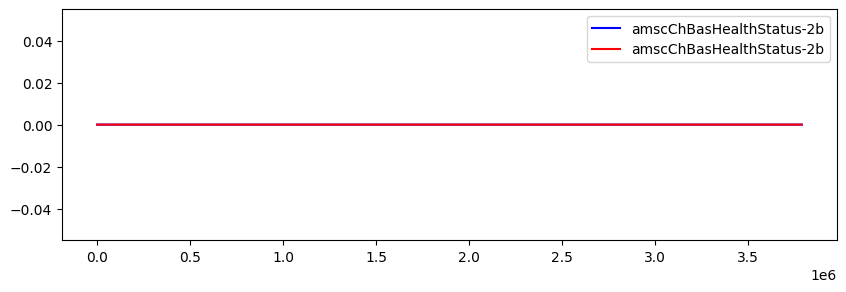

amscChBasHealthStatus-2b: 0.0, amscChBasHealthStatus-2b: 0.0


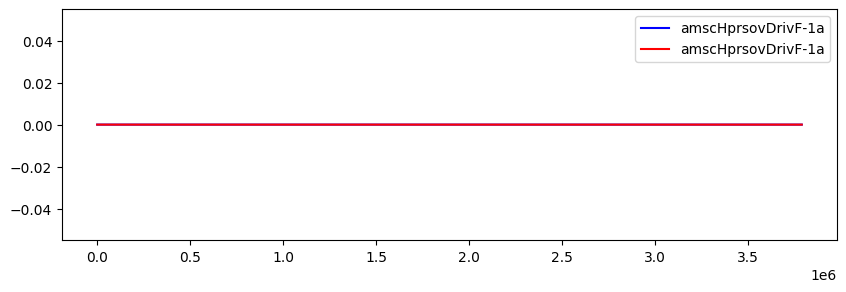

amscHprsovDrivF-1a: 0.0, amscHprsovDrivF-1a: 0.0


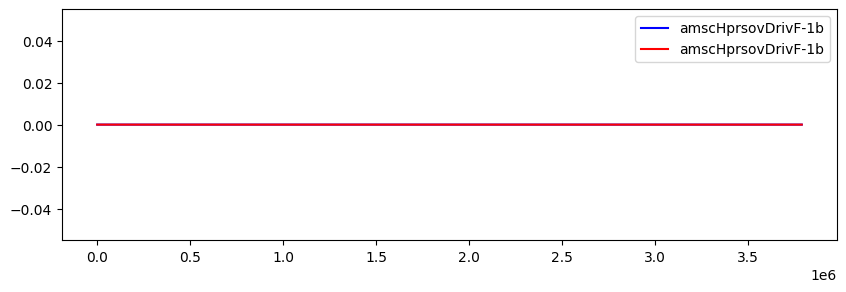

amscHprsovDrivF-1b: 0.0, amscHprsovDrivF-1b: 0.0


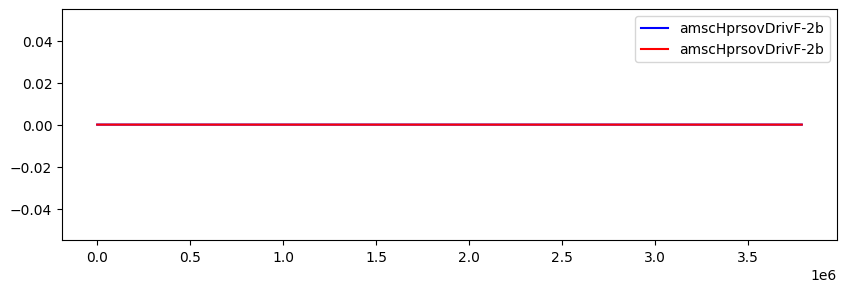

amscHprsovDrivF-2b: 0.0, amscHprsovDrivF-2b: 0.0


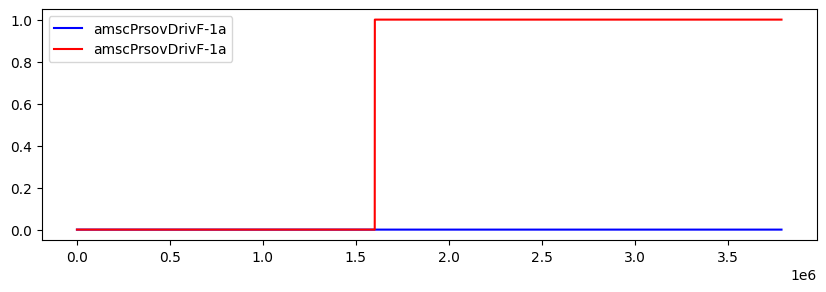

amscPrsovDrivF-1a: 0.0, amscPrsovDrivF-1a: 0.24402256611646017


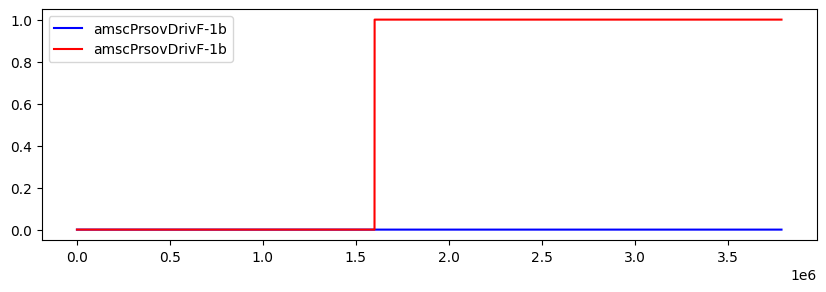

amscPrsovDrivF-1b: 0.0, amscPrsovDrivF-1b: 0.24397348105603114


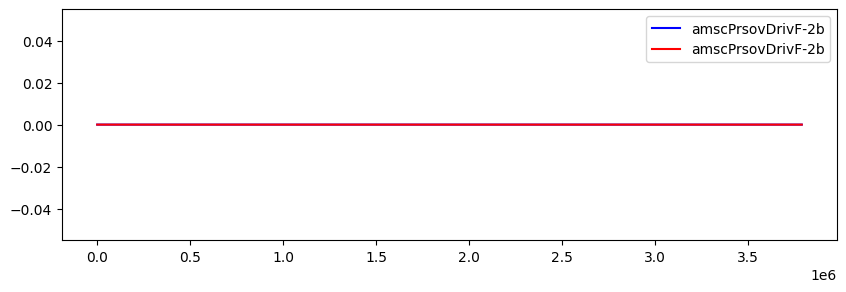

amscPrsovDrivF-2b: 0.0, amscPrsovDrivF-2b: 0.0


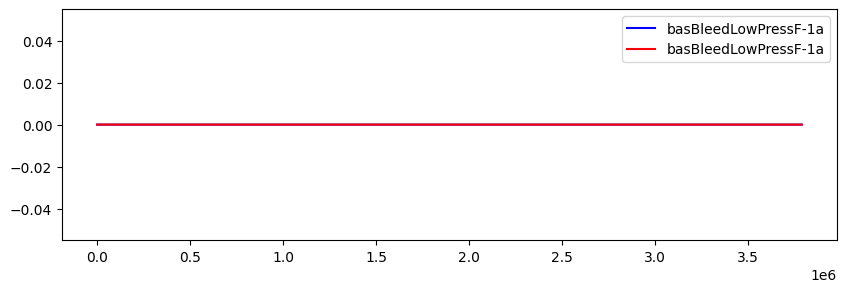

basBleedLowPressF-1a: 0.0, basBleedLowPressF-1a: 0.0


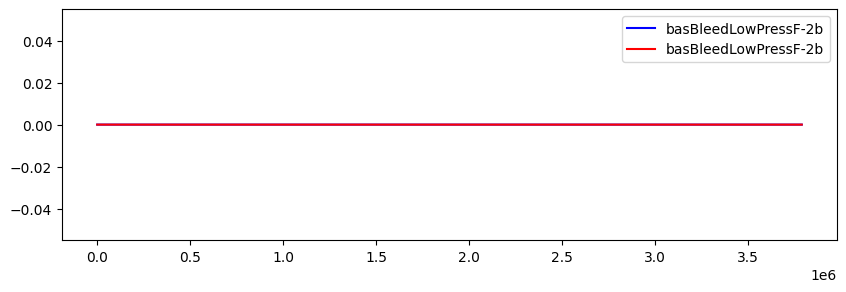

basBleedLowPressF-2b: 0.0, basBleedLowPressF-2b: 0.0


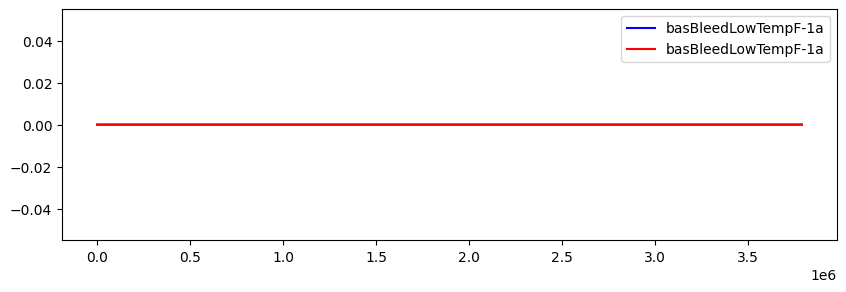

basBleedLowTempF-1a: 0.0, basBleedLowTempF-1a: 0.0


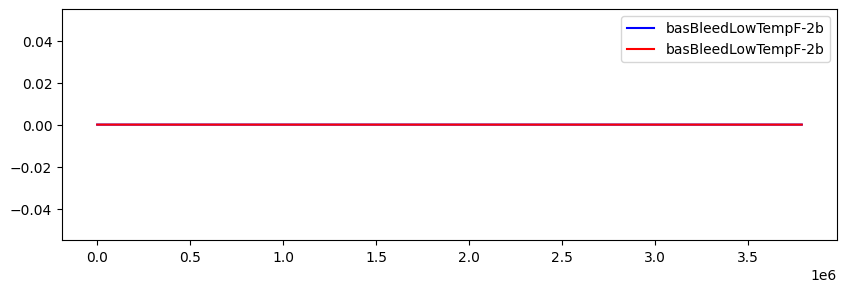

basBleedLowTempF-2b: 0.0, basBleedLowTempF-2b: 0.0


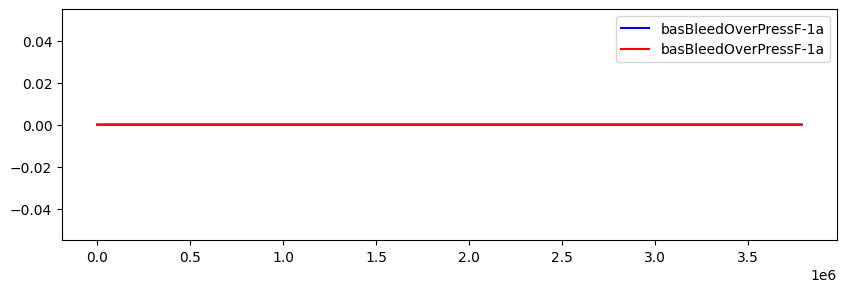

basBleedOverPressF-1a: 0.0, basBleedOverPressF-1a: 0.0


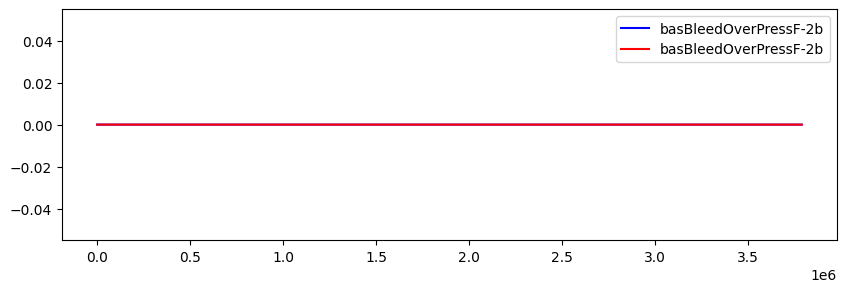

basBleedOverPressF-2b: 0.0, basBleedOverPressF-2b: 0.0


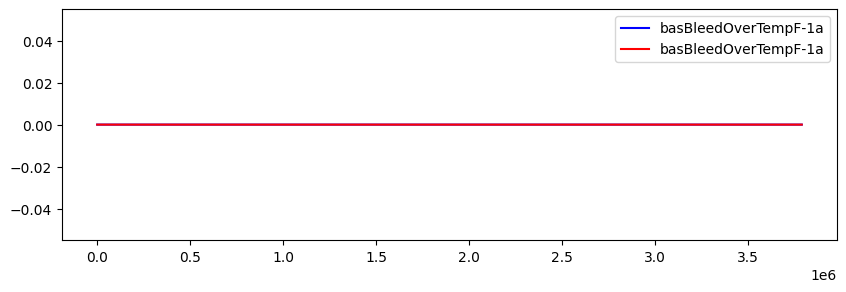

basBleedOverTempF-1a: 0.0, basBleedOverTempF-1a: 0.0


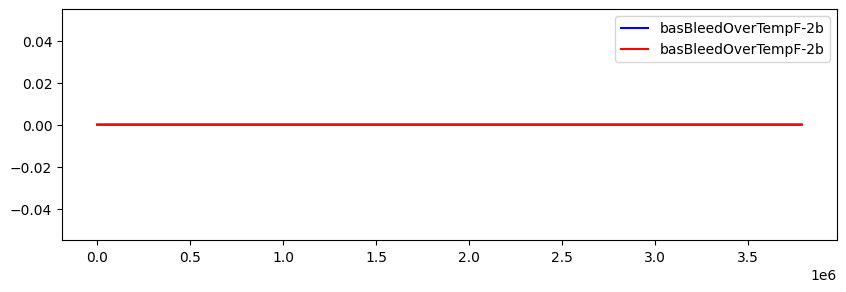

basBleedOverTempF-2b: 0.0, basBleedOverTempF-2b: 0.0


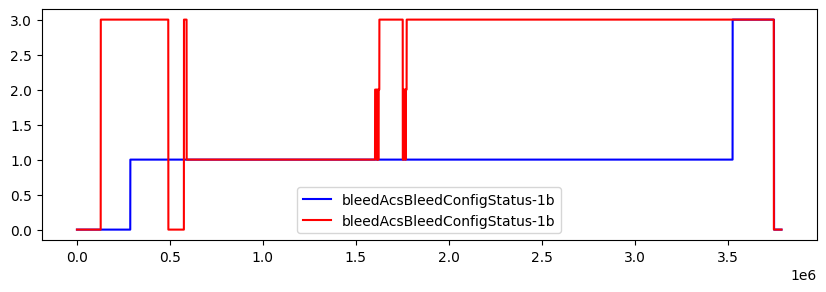

bleedAcsBleedConfigStatus-1b: 0.3205208150589957, bleedAcsBleedConfigStatus-1b: 1.131461682784025


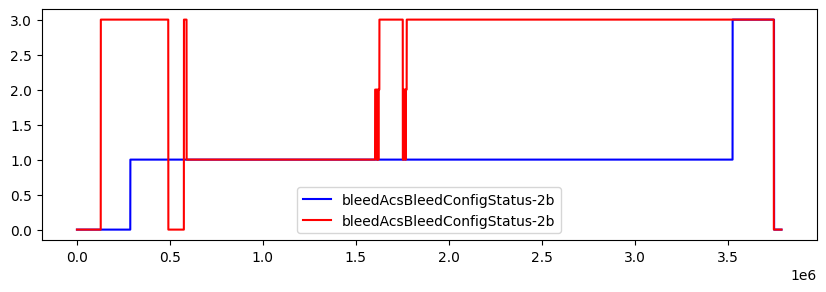

bleedAcsBleedConfigStatus-2b: 0.3207995540510465, bleedAcsBleedConfigStatus-2b: 1.1319482939073973


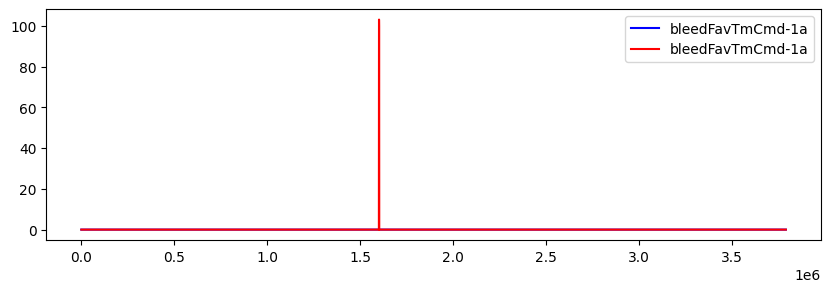

bleedFavTmCmd-1a: 0.0, bleedFavTmCmd-1a: 3.6466880001748607


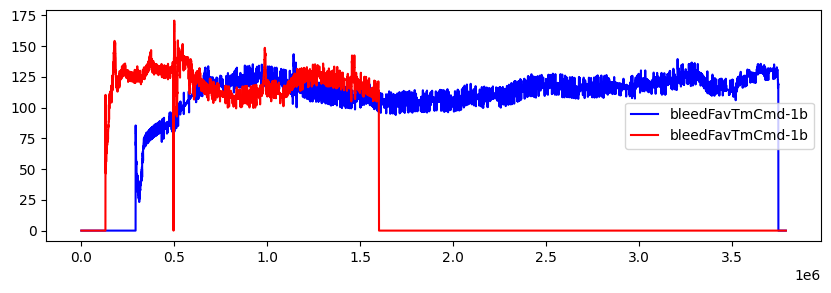

bleedFavTmCmd-1b: 1189.183150263846, bleedFavTmCmd-1b: 3500.7058409406172


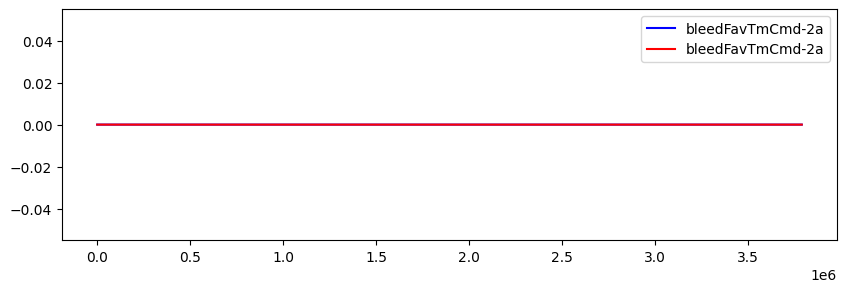

bleedFavTmCmd-2a: 0.0, bleedFavTmCmd-2a: 0.0


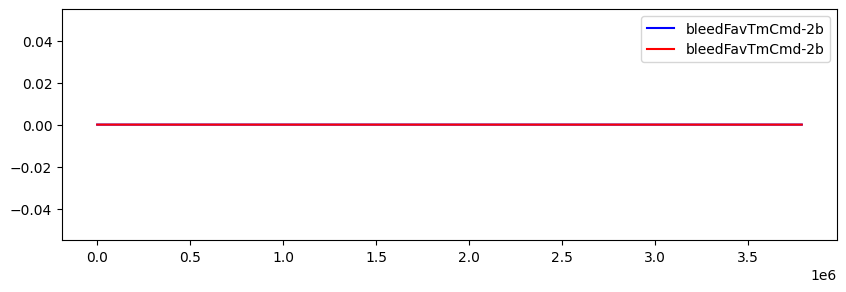

bleedFavTmCmd-2b: 0.0, bleedFavTmCmd-2b: 0.0


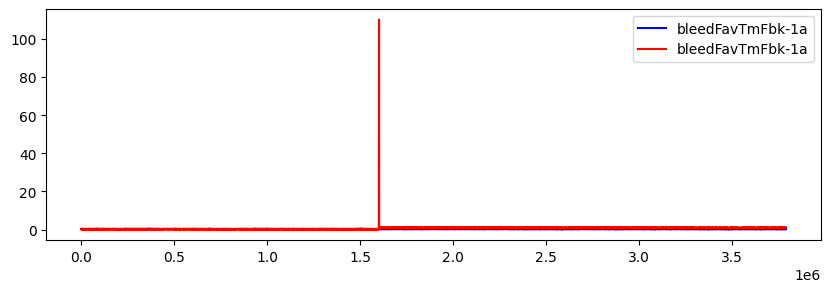

bleedFavTmFbk-1a: 0.004323625144705416, bleedFavTmFbk-1a: 3.1531689714292703


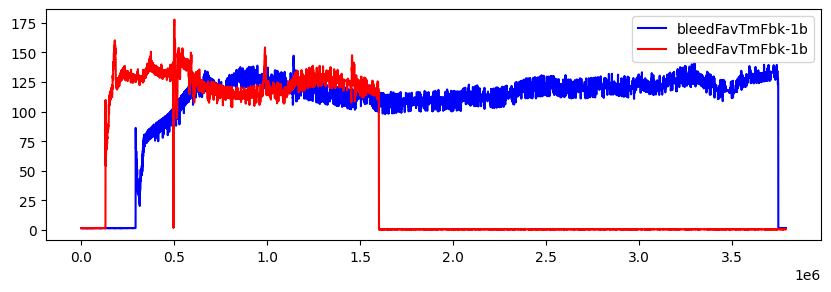

bleedFavTmFbk-1b: 1220.892105913049, bleedFavTmFbk-1b: 3656.2119198615233


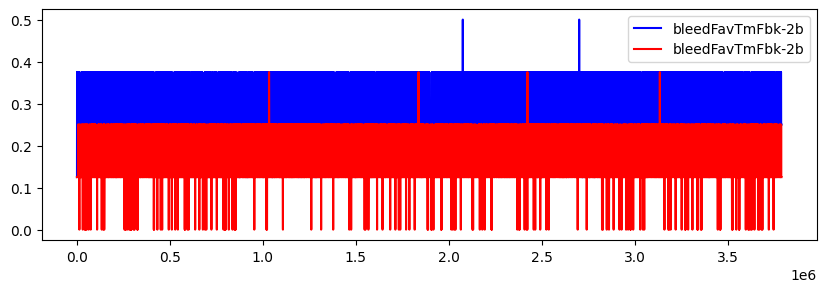

bleedFavTmFbk-2b: 0.0038516294755129646, bleedFavTmFbk-2b: 0.004017162150687869


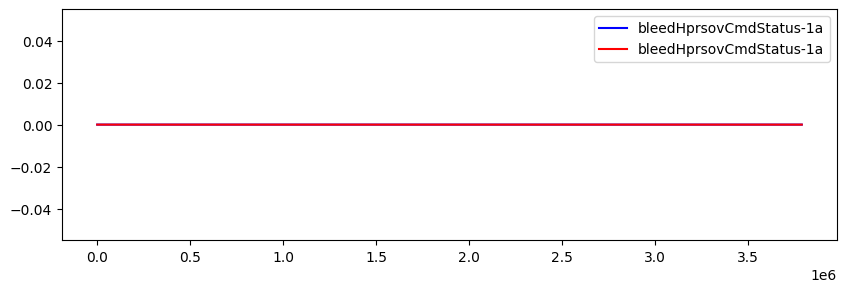

bleedHprsovCmdStatus-1a: 0.0, bleedHprsovCmdStatus-1a: 0.0


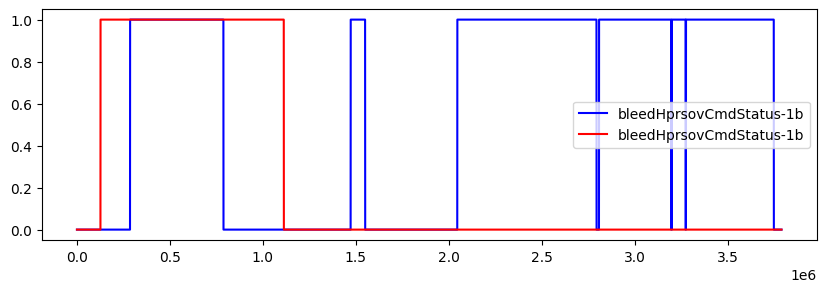

bleedHprsovCmdStatus-1b: 0.24056408827274212, bleedHprsovCmdStatus-1b: 0.19249080279389494


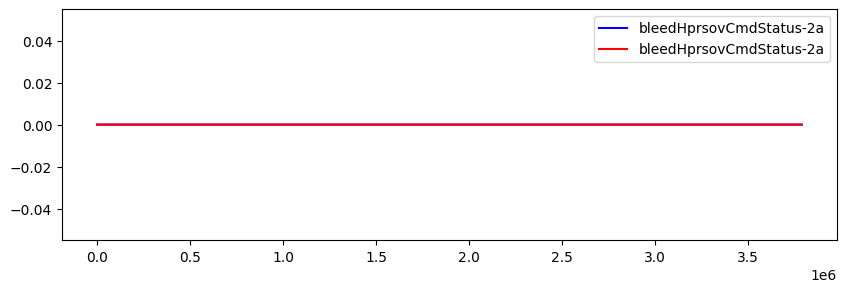

bleedHprsovCmdStatus-2a: 0.0, bleedHprsovCmdStatus-2a: 0.0


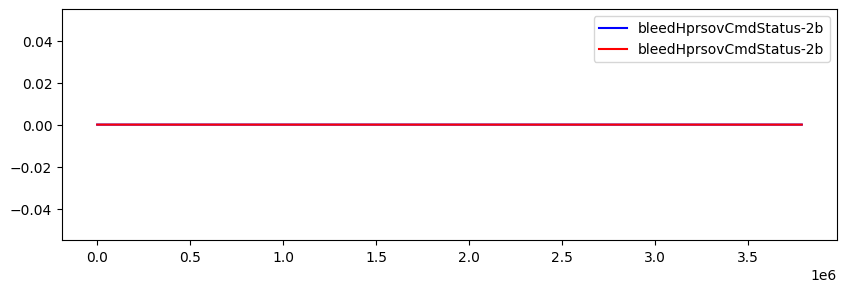

bleedHprsovCmdStatus-2b: 0.0, bleedHprsovCmdStatus-2b: 0.0


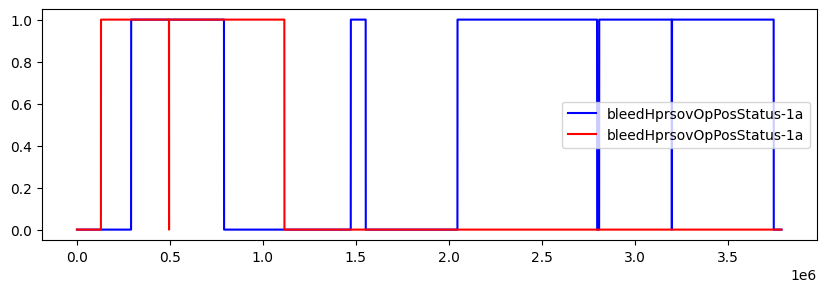

bleedHprsovOpPosStatus-1a: 0.24028513091590561, bleedHprsovOpPosStatus-1a: 0.19250346063780918


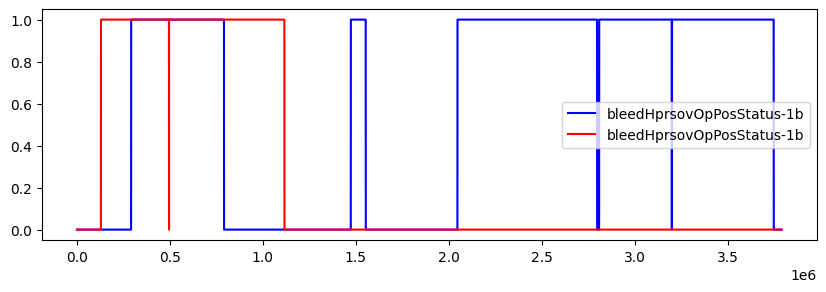

bleedHprsovOpPosStatus-1b: 0.24029033370941874, bleedHprsovOpPosStatus-1b: 0.19251611708864685


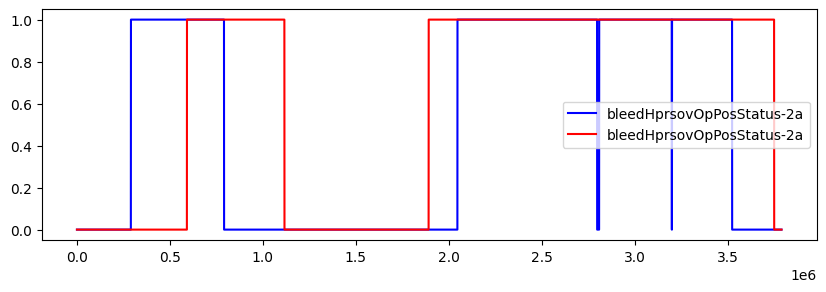

bleedHprsovOpPosStatus-2a: 0.24964994505409135, bleedHprsovOpPosStatus-2a: 0.2334309476165551


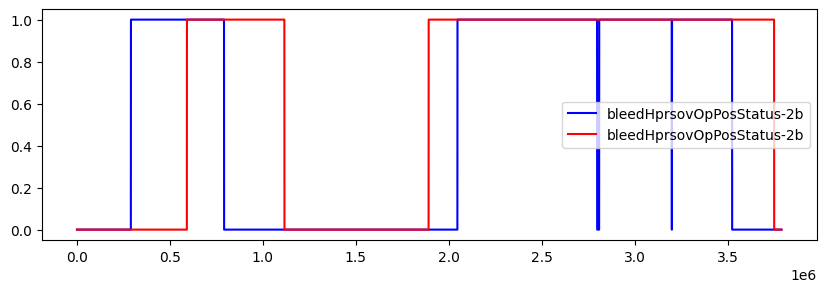

bleedHprsovOpPosStatus-2b: 0.24964994505409138, bleedHprsovOpPosStatus-2b: 0.2334173546698506


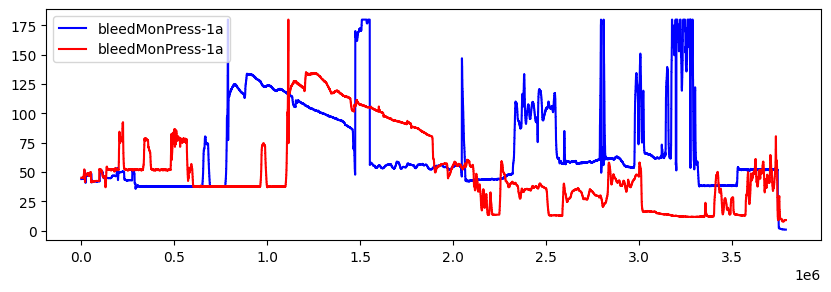

bleedMonPress-1a: 1363.362317171934, bleedMonPress-1a: 1100.3736146685064


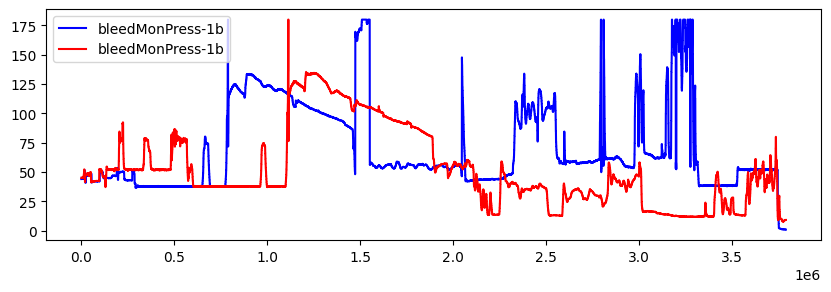

bleedMonPress-1b: 1360.1745351563052, bleedMonPress-1b: 1100.4370154972112


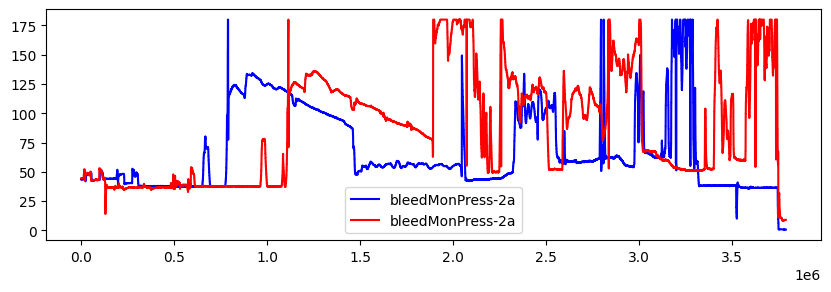

bleedMonPress-2a: 1199.700084774387, bleedMonPress-2a: 2130.455313531663


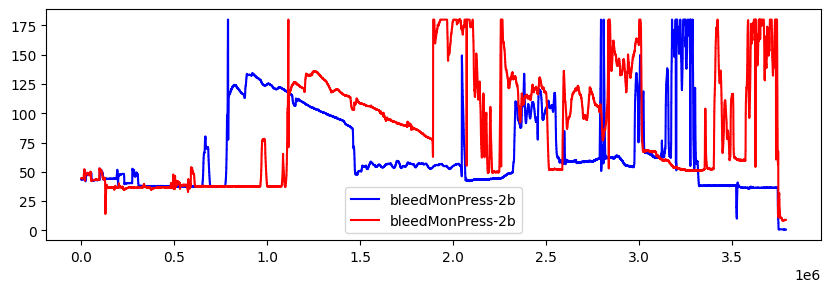

bleedMonPress-2b: 1198.757484536259, bleedMonPress-2b: 2130.3148198332633


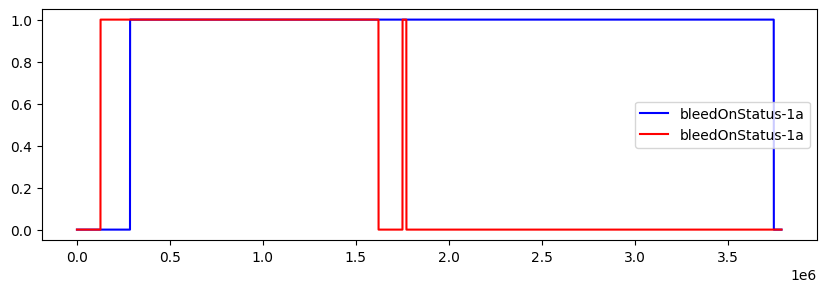

bleedOnStatus-1a: 0.07886535734932226, bleedOnStatus-1a: 0.24001530378430108


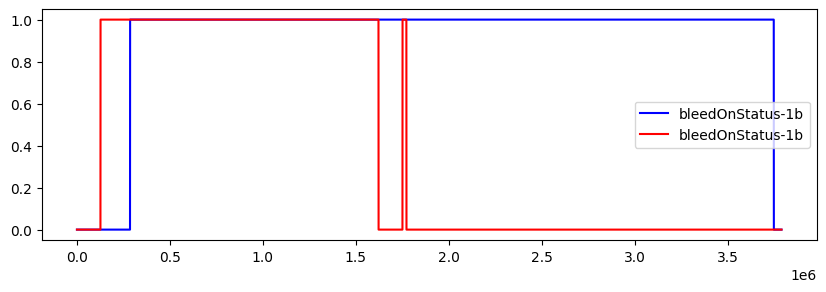

bleedOnStatus-1b: 0.07886535734932229, bleedOnStatus-1b: 0.24004166253837073


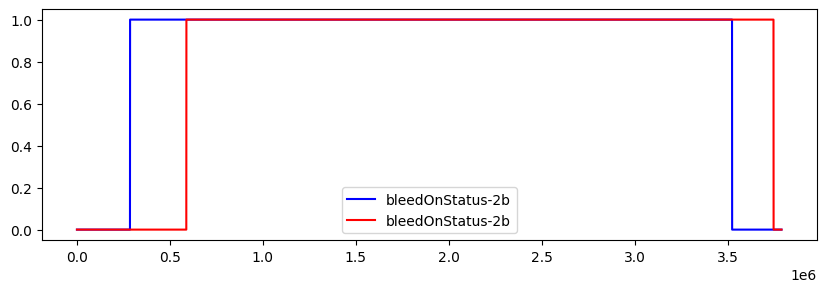

bleedOnStatus-2b: 0.12431141006956786, bleedOnStatus-2b: 0.13883646444927783


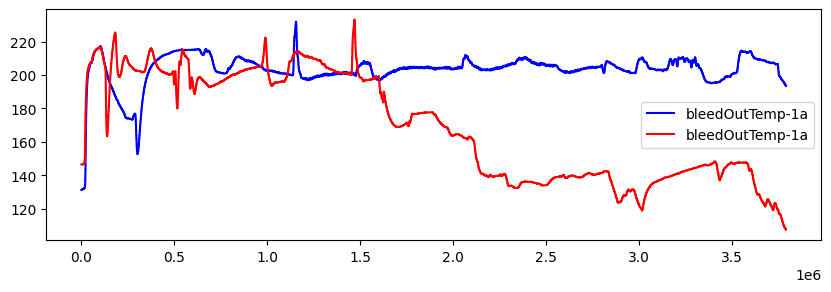

bleedOutTemp-1a: 92.72152529078198, bleedOutTemp-1a: 1006.0886074560239


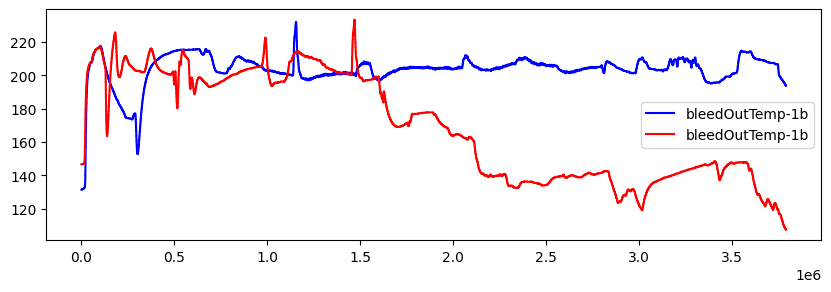

bleedOutTemp-1b: 92.42226736780299, bleedOutTemp-1b: 1003.3239466168883


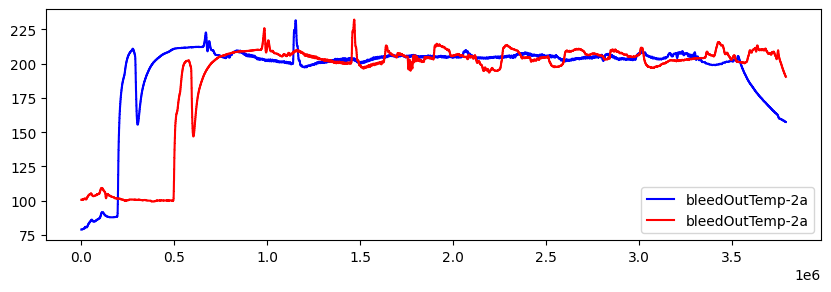

bleedOutTemp-2a: 762.2593698719973, bleedOutTemp-2a: 1250.1509966541464


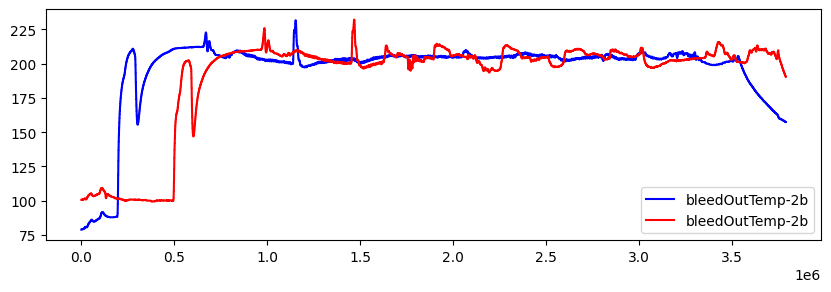

bleedOutTemp-2b: 762.2560382977674, bleedOutTemp-2b: 1250.1467607079865


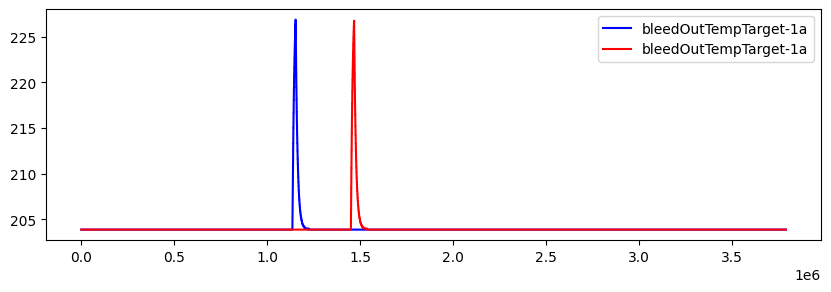

bleedOutTempTarget-1a: 1.8544691668361075, bleedOutTempTarget-1a: 1.854329607326586


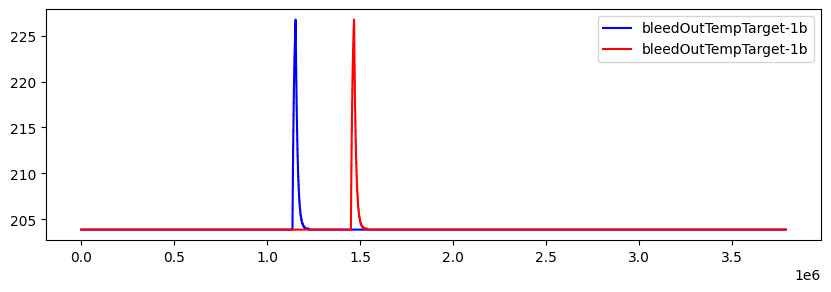

bleedOutTempTarget-1b: 1.8541104385832692, bleedOutTempTarget-1b: 1.8541253094820203


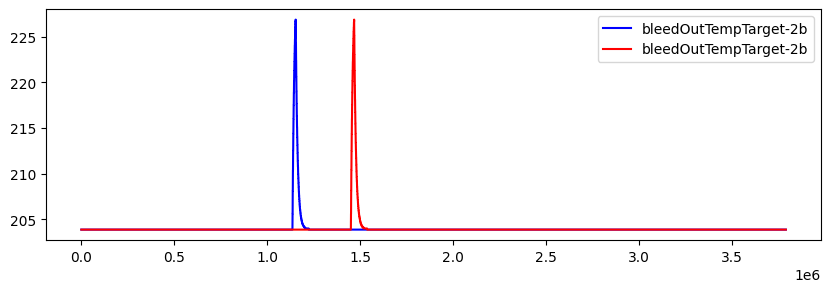

bleedOutTempTarget-2b: 1.886731710623166, bleedOutTempTarget-2b: 1.8703605006426622


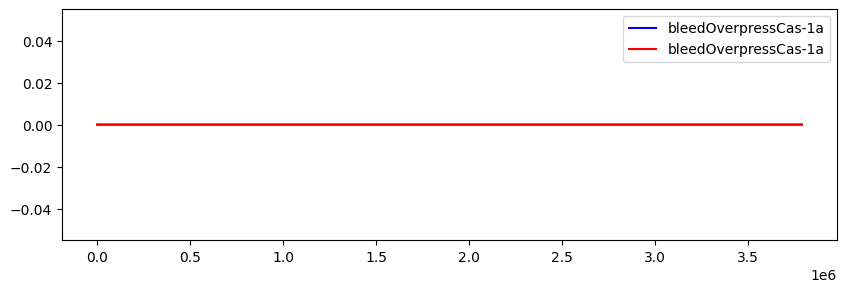

bleedOverpressCas-1a: 0.0, bleedOverpressCas-1a: 0.0


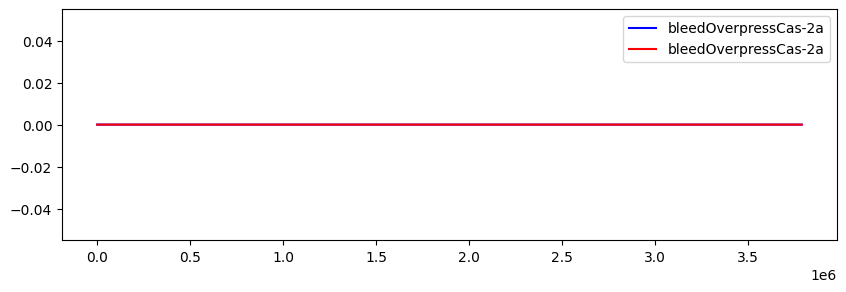

bleedOverpressCas-2a: 0.0, bleedOverpressCas-2a: 0.0


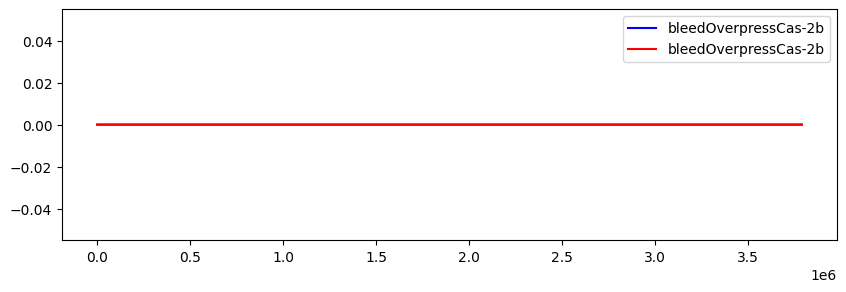

bleedOverpressCas-2b: 0.0, bleedOverpressCas-2b: 0.0


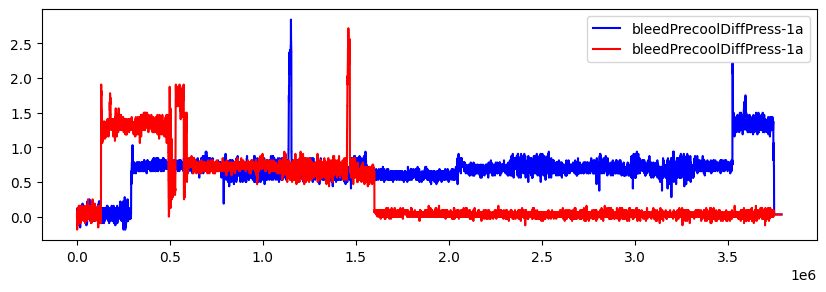

bleedPrecoolDiffPress-1a: 0.07927208943842592, bleedPrecoolDiffPress-1a: 0.23010335031979492


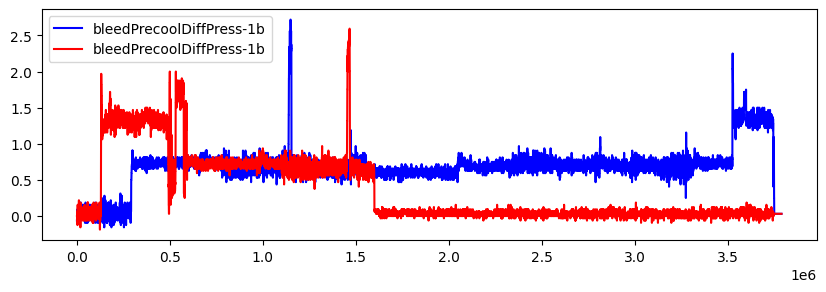

bleedPrecoolDiffPress-1b: 0.07936719041250996, bleedPrecoolDiffPress-1b: 0.23037509827811148


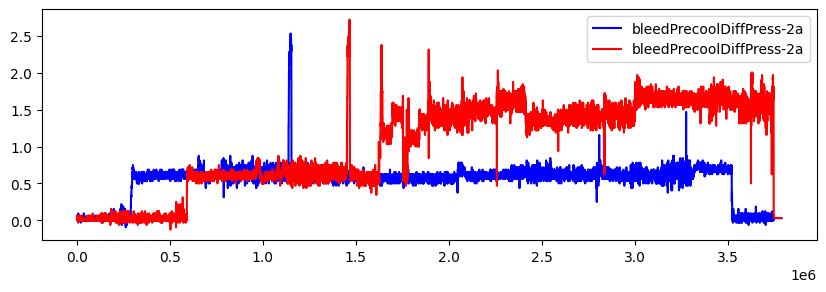

bleedPrecoolDiffPress-2a: 0.05826199596023993, bleedPrecoolDiffPress-2a: 0.3556166883732136


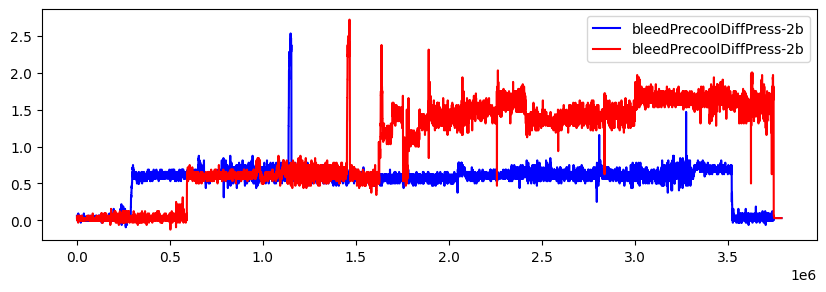

bleedPrecoolDiffPress-2b: 0.05826293264248535, bleedPrecoolDiffPress-2b: 0.35571167139355464


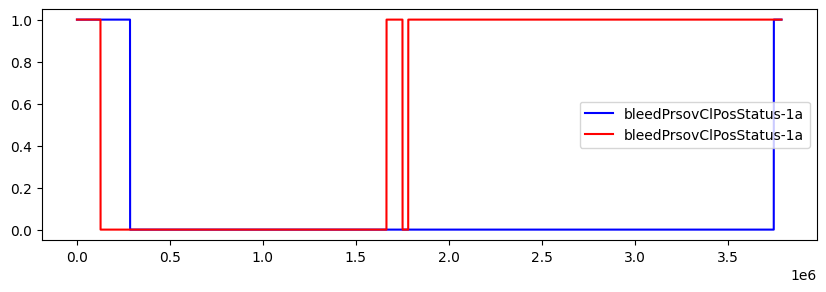

bleedPrsovClPosStatus-1a: 0.07886535734932228, bleedPrsovClPosStatus-1a: 0.2426155199083228


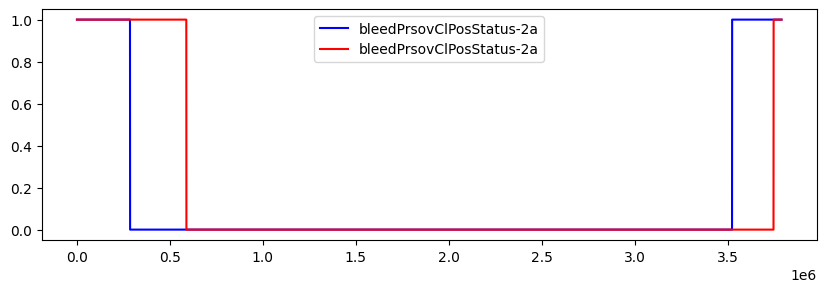

bleedPrsovClPosStatus-2a: 0.12433012292171704, bleedPrsovClPosStatus-2a: 0.13881886466547774


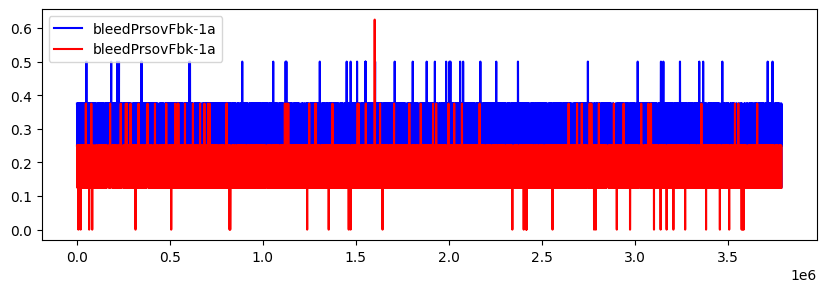

bleedPrsovFbk-1a: 0.004274785374624239, bleedPrsovFbk-1a: 0.004279762870618108


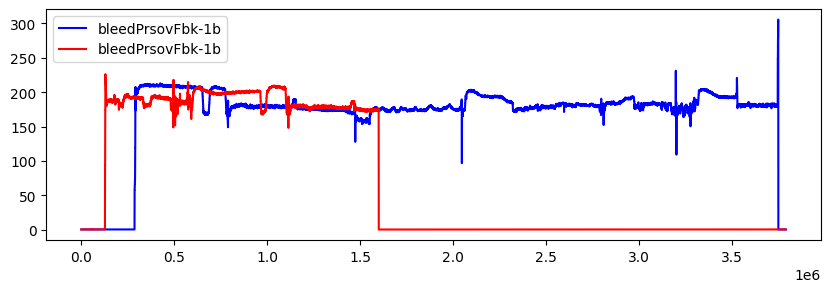

bleedPrsovFbk-1b: 2810.5511517634623, bleedPrsovFbk-1b: 8454.977285682198


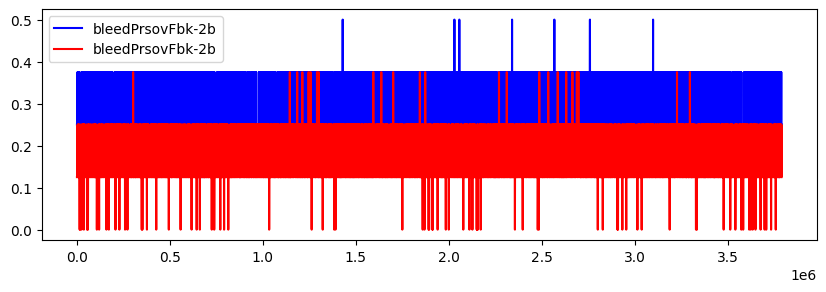

bleedPrsovFbk-2b: 0.003934145255181001, bleedPrsovFbk-2b: 0.004139613567213442


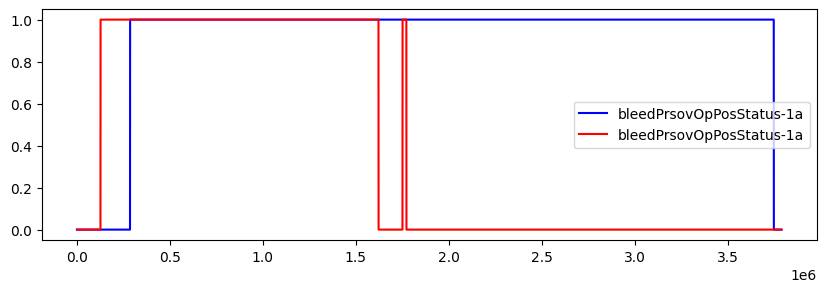

bleedPrsovOpPosStatus-1a: 0.07886535734932229, bleedPrsovOpPosStatus-1a: 0.24002585146515928


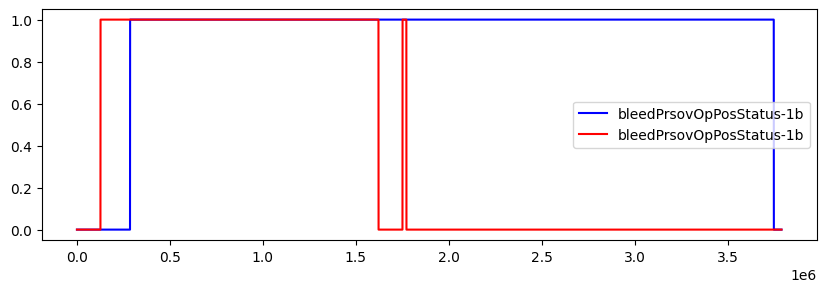

bleedPrsovOpPosStatus-1b: 0.07886535734932229, bleedPrsovOpPosStatus-1b: 0.24002585146515928


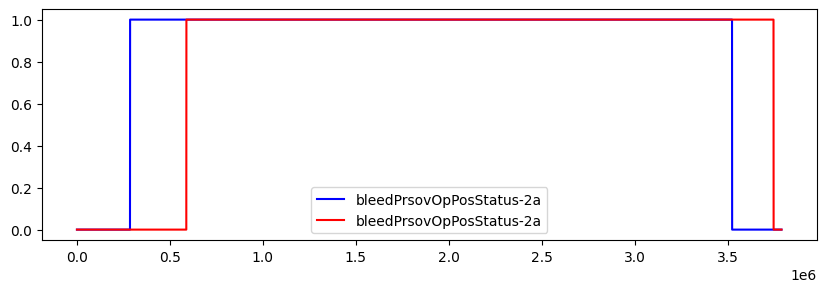

bleedPrsovOpPosStatus-2a: 0.12433012292171704, bleedPrsovOpPosStatus-2a: 0.13881886466547774


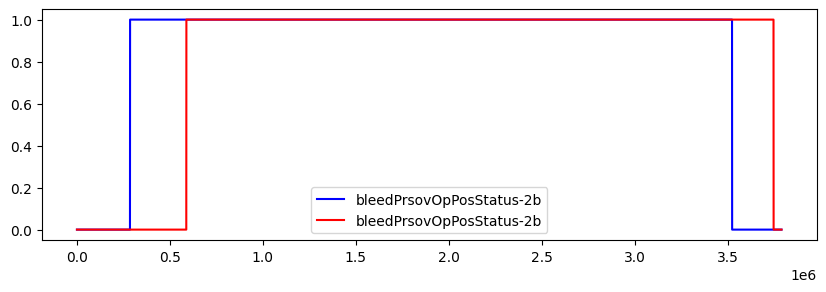

bleedPrsovOpPosStatus-2b: 0.12431141006956786, bleedPrsovOpPosStatus-2b: 0.13880126348860086


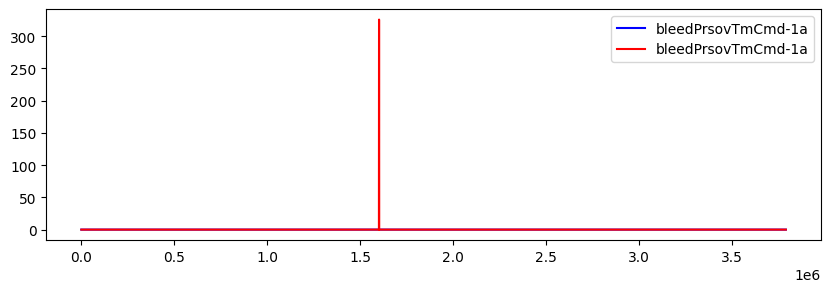

bleedPrsovTmCmd-1a: 0.0, bleedPrsovTmCmd-1a: 27.1138780644864


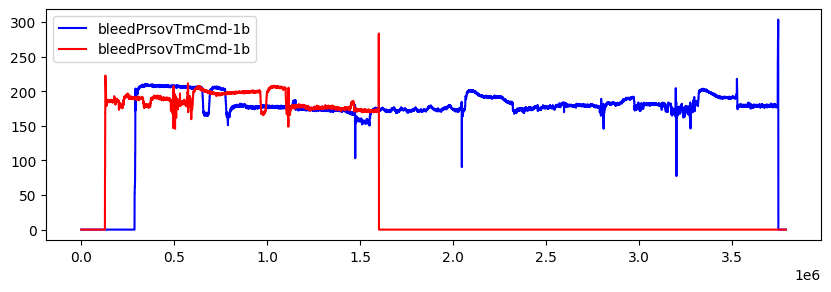

bleedPrsovTmCmd-1b: 2764.3266601784408, bleedPrsovTmCmd-1b: 8313.811883789793


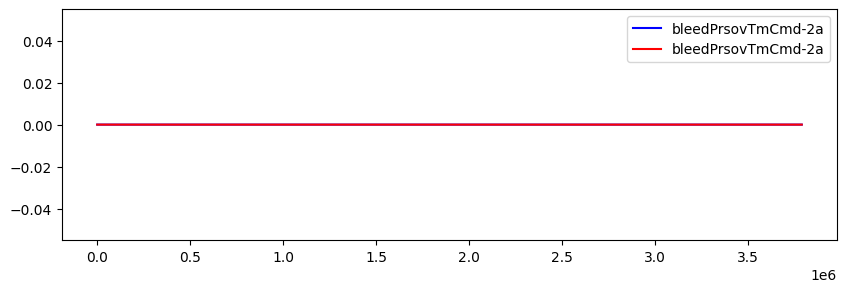

bleedPrsovTmCmd-2a: 0.0, bleedPrsovTmCmd-2a: 0.0


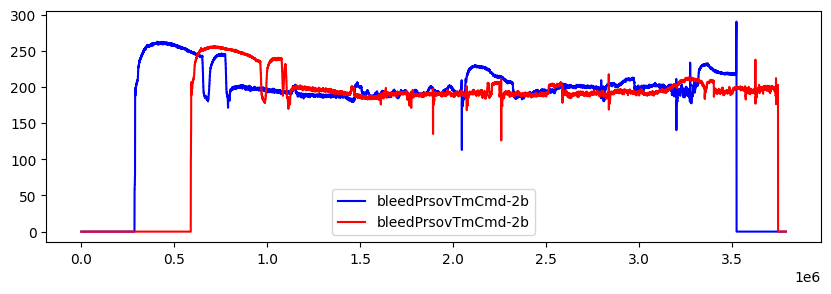

bleedPrsovTmCmd-2b: 5659.636176917442, bleedPrsovTmCmd-2b: 5924.861339034977


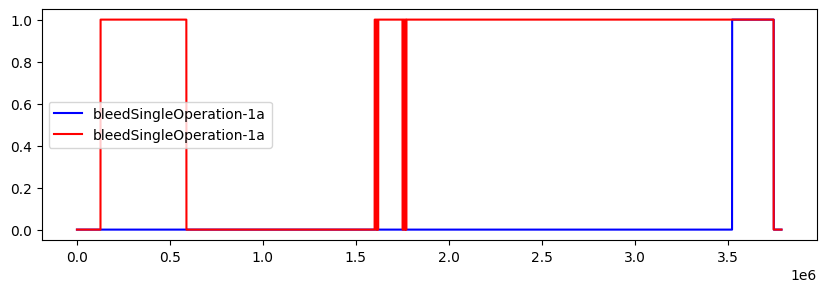

bleedSingleOperation-1a: 0.05565845586862831, bleedSingleOperation-1a: 0.21678581286704157


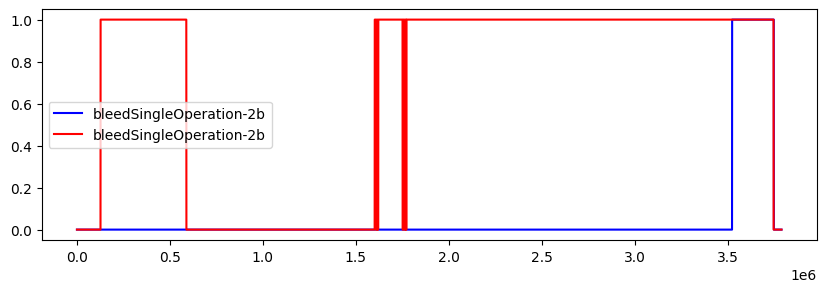

bleedSingleOperation-2b: 0.055751523149232284, bleedSingleOperation-2b: 0.21685312041659235


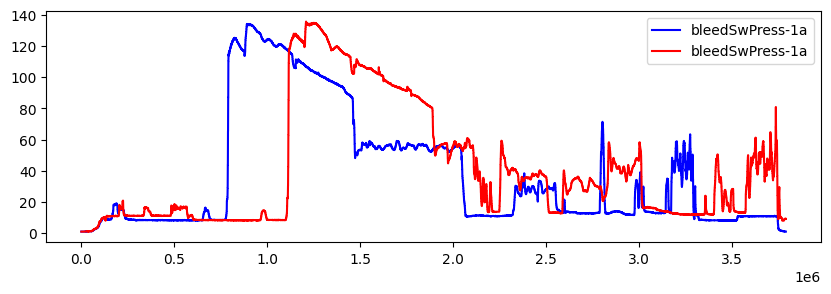

bleedSwPress-1a: 1488.3450312028235, bleedSwPress-1a: 1436.4846592861693


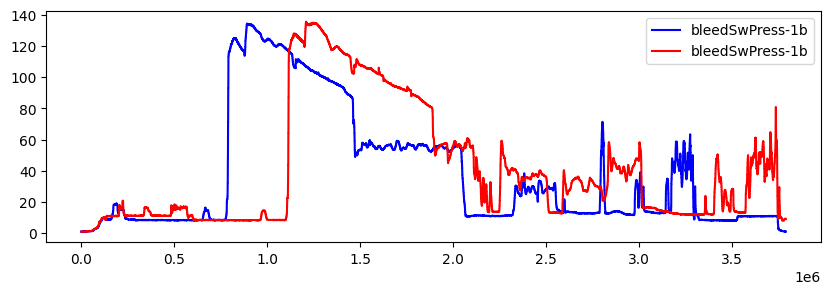

bleedSwPress-1b: 1489.3598235781085, bleedSwPress-1b: 1437.3754497577775


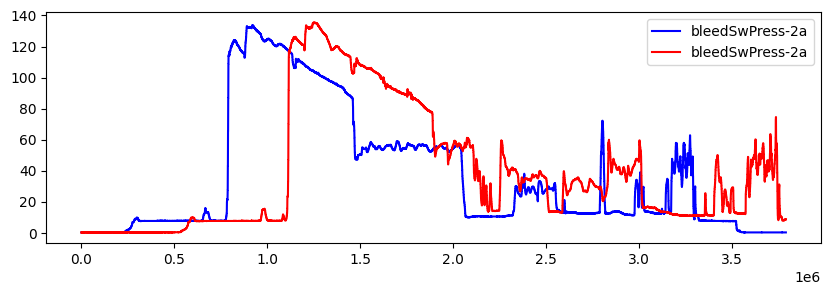

bleedSwPress-2a: 1568.583069121961, bleedSwPress-2a: 1526.1870847536202


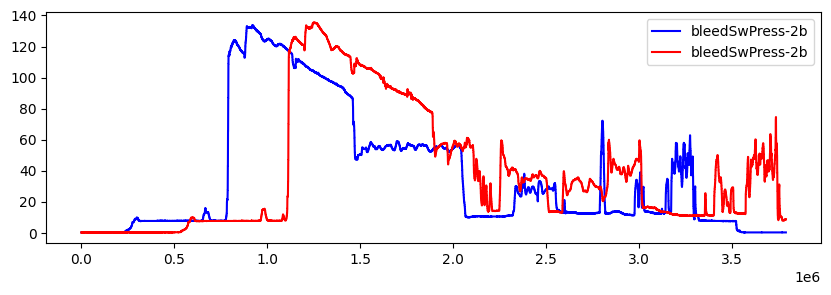

bleedSwPress-2b: 1568.6170243636018, bleedSwPress-2b: 1526.2091253012495


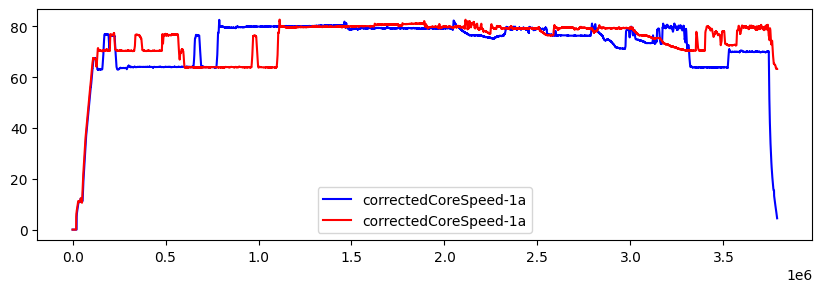

correctedCoreSpeed-1a: 152.6596744620518, correctedCoreSpeed-1a: 113.80504519797053


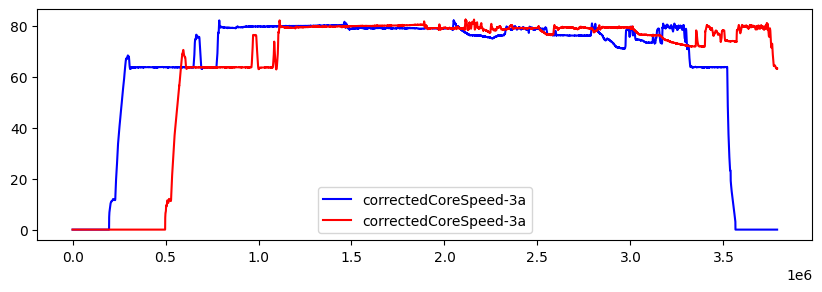

correctedCoreSpeed-3a: 651.0514234935692, correctedCoreSpeed-3a: 723.8894774927415


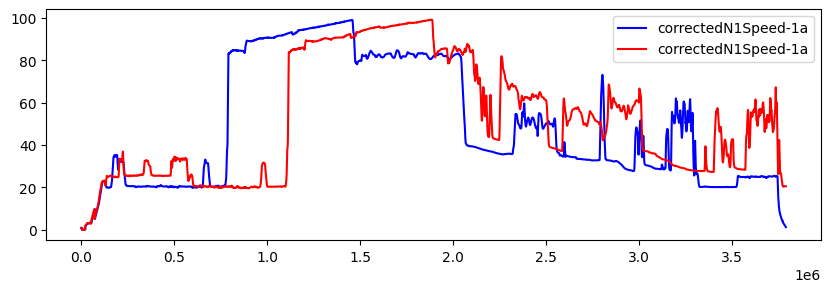

correctedN1Speed-1a: 854.1765289297426, correctedN1Speed-1a: 774.754626759029


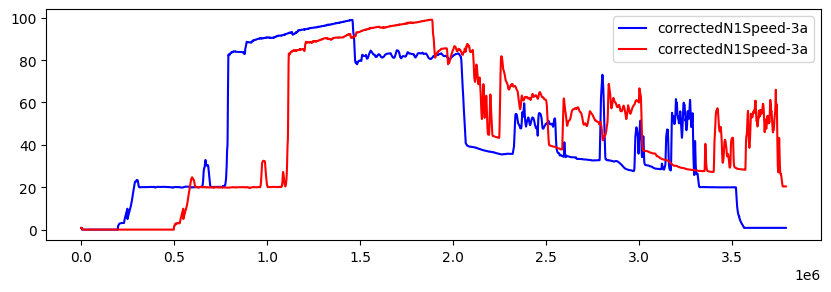

correctedN1Speed-3a: 1034.7148565122834, correctedN1Speed-3a: 1021.7386499161028


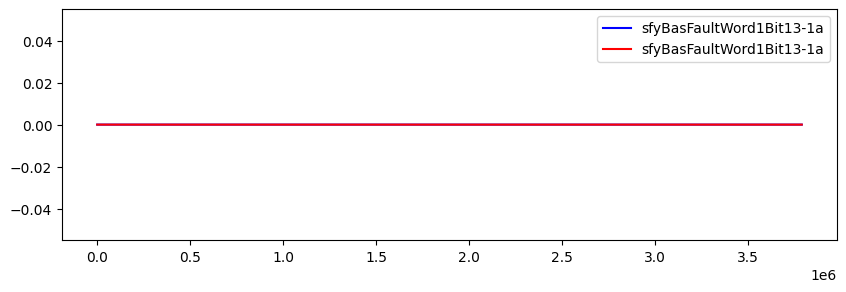

sfyBasFaultWord1Bit13-1a: 0.0, sfyBasFaultWord1Bit13-1a: 0.0


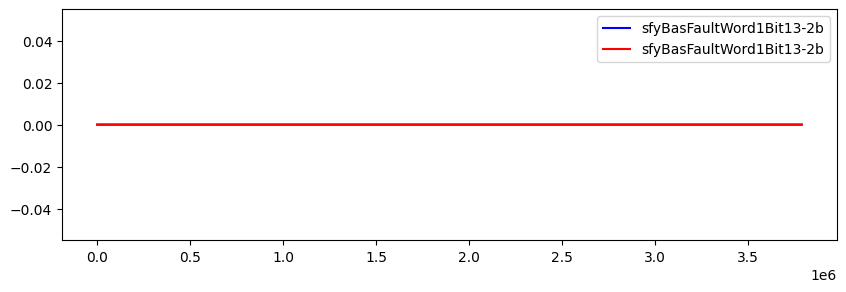

sfyBasFaultWord1Bit13-2b: 0.0, sfyBasFaultWord1Bit13-2b: 0.0


In [13]:
# Lista de colunas dos sensores
sensor_columns = [
    'amscChBasHealthStatus-1b',
    'amscChBasHealthStatus-1a', 'amscChBasHealthStatus-2b',
    'amscHprsovDrivF-1a', 'amscHprsovDrivF-1b', 'amscHprsovDrivF-2b',
    'amscPrsovDrivF-1a', 'amscPrsovDrivF-1b', 'amscPrsovDrivF-2b',
    'basBleedLowPressF-1a', 'basBleedLowPressF-2b', 'basBleedLowTempF-1a',
    'basBleedLowTempF-2b', 'basBleedOverPressF-1a', 'basBleedOverPressF-2b',
    'basBleedOverTempF-1a', 'basBleedOverTempF-2b',
    'bleedAcsBleedConfigStatus-1b', 'bleedAcsBleedConfigStatus-2b',
    'bleedFavTmCmd-1a', 'bleedFavTmCmd-1b', 'bleedFavTmCmd-2a',
    'bleedFavTmCmd-2b', 'bleedFavTmFbk-1a', 'bleedFavTmFbk-1b',
    'bleedFavTmFbk-2b', 'bleedHprsovCmdStatus-1a',
    'bleedHprsovCmdStatus-1b', 'bleedHprsovCmdStatus-2a',
    'bleedHprsovCmdStatus-2b', 'bleedHprsovOpPosStatus-1a',
    'bleedHprsovOpPosStatus-1b', 'bleedHprsovOpPosStatus-2a',
    'bleedHprsovOpPosStatus-2b', 'bleedMonPress-1a', 'bleedMonPress-1b',
    'bleedMonPress-2a', 'bleedMonPress-2b', 'bleedOnStatus-1a',
    'bleedOnStatus-1b', 'bleedOnStatus-2b', 'bleedOutTemp-1a',
    'bleedOutTemp-1b', 'bleedOutTemp-2a', 'bleedOutTemp-2b',
    'bleedOutTempTarget-1a', 'bleedOutTempTarget-1b',
    'bleedOutTempTarget-2b', 'bleedOverpressCas-1a', 'bleedOverpressCas-2a',
    'bleedOverpressCas-2b', 'bleedPrecoolDiffPress-1a',
    'bleedPrecoolDiffPress-1b', 'bleedPrecoolDiffPress-2a',
    'bleedPrecoolDiffPress-2b', 'bleedPrsovClPosStatus-1a',
    'bleedPrsovClPosStatus-2a', 'bleedPrsovFbk-1a', 'bleedPrsovFbk-1b',
    'bleedPrsovFbk-2b', 'bleedPrsovOpPosStatus-1a',
    'bleedPrsovOpPosStatus-1b', 'bleedPrsovOpPosStatus-2a',
    'bleedPrsovOpPosStatus-2b', 'bleedPrsovTmCmd-1a', 'bleedPrsovTmCmd-1b',
    'bleedPrsovTmCmd-2a', 'bleedPrsovTmCmd-2b', 'bleedSingleOperation-1a',
    'bleedSingleOperation-2b', 'bleedSwPress-1a', 'bleedSwPress-1b',
    'bleedSwPress-2a', 'bleedSwPress-2b', 'correctedCoreSpeed-1a',
    'correctedCoreSpeed-3a', 'correctedN1Speed-1a', 'correctedN1Speed-3a',
    'sfyBasFaultWord1Bit13-1a','sfyBasFaultWord1Bit13-2b'
]

for i in sensor_columns:
    y_sem_bleed = df_sem_bleed[i]
    y_com_bleed = df_com_bleed_reduzido[i]
    x = df_sem_bleed['recording_time']
    plt.figure(figsize=(10,3))

    plt.plot(x,y_sem_bleed, label = i, color="blue")
    plt.plot(x,y_com_bleed, label = i, color="red")
    plt.legend()
    plt.show()
    print(f'{i}: {y_sem_bleed.var()}, {i}: {y_com_bleed.var()}')

# Comparando 400 arquivos sem bleed

In [14]:
file_path = "../../../../Exploração/Datasets/06120018"
parquet_files = [file for file in os.listdir(file_path) if file.endswith('.parquet')] 
dfs = list()
bleed_erro_files= ['TCRF_ARCHIVE_06120018_20230602190602.parquet', 'TCRF_ARCHIVE_06120018_20230602190605.parquet','TCRF_ARCHIVE_06120018_20230602190604.parquet','TCRF_ARCHIVE_06120018_20230602190601.parquet','TCRF_ARCHIVE_06120018_20230601141302.parquet','TCRF_ARCHIVE_06120018_20230601141301.parquet','TCRF_ARCHIVE_06120018_20230601013839.parquet','TCRF_ARCHIVE_06120018_20230531223738.parquet','TCRF_ARCHIVE_06120018_20230531195638.parquet','TCRF_ARCHIVE_06120018_20230531180237.parquet']
for bleed_file in bleed_erro_files:
    full_path = os.path.join(file_path, bleed_file)
    df = pd.read_parquet(full_path, engine='pyarrow')
    df=df.fillna(method='ffill')
    df=df.fillna(method='bfill')
    dfs.append(df)
i=0
number_of_bleed = 0
for file_name in parquet_files:
    full_path = os.path.join(file_path, file_name)
    df = pd.read_parquet(full_path, engine='pyarrow')
    df=df.fillna(method='ffill')
    df=df.fillna(method='bfill')
    dfs.append(df)
    i+=1
    print(i)
    if (df['message0418DAA-1'].unique().any() != 0 or df['message0422DAA-1'].unique().any()!=0):
        print(df['message0418DAA-1'].unique(), df['message0422DAA-1'].unique())
        number_of_bleed +=1
    if i >= 400:
        break
print(number_of_bleed + len(bleed_erro_files))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
[0. 5. 7.] [0.]
136
137
138
139
140
141
142
143
144
145
146
147
148
[0. 5. 7.] [0.]
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269


In [ ]:
sensor_columns = [
    'amscChBasHealthStatus-1b',
    'amscChBasHealthStatus-1a', 'amscChBasHealthStatus-2b',
    'amscHprsovDrivF-1a', 'amscHprsovDrivF-1b', 'amscHprsovDrivF-2b',
    'amscPrsovDrivF-1a', 'amscPrsovDrivF-1b', 'amscPrsovDrivF-2b',
    'basBleedLowPressF-1a', 'basBleedLowPressF-2b', 'basBleedLowTempF-1a',
    'basBleedLowTempF-2b', 'basBleedOverPressF-1a', 'basBleedOverPressF-2b',
    'basBleedOverTempF-1a', 'basBleedOverTempF-2b',
    'bleedAcsBleedConfigStatus-1b', 'bleedAcsBleedConfigStatus-2b',
    'bleedFavTmCmd-1a', 'bleedFavTmCmd-1b', 'bleedFavTmCmd-2a',
    'bleedFavTmCmd-2b', 'bleedFavTmFbk-1a', 'bleedFavTmFbk-1b',
    'bleedFavTmFbk-2b', 'bleedHprsovCmdStatus-1a',
    'bleedHprsovCmdStatus-1b', 'bleedHprsovCmdStatus-2a',
    'bleedHprsovCmdStatus-2b', 'bleedHprsovOpPosStatus-1a',
    'bleedHprsovOpPosStatus-1b', 'bleedHprsovOpPosStatus-2a',
    'bleedHprsovOpPosStatus-2b', 'bleedMonPress-1a', 'bleedMonPress-1b',
    'bleedMonPress-2a', 'bleedMonPress-2b', 'bleedOnStatus-1a',
    'bleedOnStatus-1b', 'bleedOnStatus-2b', 'bleedOutTemp-1a',
    'bleedOutTemp-1b', 'bleedOutTemp-2a', 'bleedOutTemp-2b',
    'bleedOutTempTarget-1a', 'bleedOutTempTarget-1b',
    'bleedOutTempTarget-2b', 'bleedOverpressCas-1a', 'bleedOverpressCas-2a',
    'bleedOverpressCas-2b', 'bleedPrecoolDiffPress-1a',
    'bleedPrecoolDiffPress-1b', 'bleedPrecoolDiffPress-2a',
    'bleedPrecoolDiffPress-2b', 'bleedPrsovClPosStatus-1a',
    'bleedPrsovClPosStatus-2a', 'bleedPrsovFbk-1a', 'bleedPrsovFbk-1b',
    'bleedPrsovFbk-2b', 'bleedPrsovOpPosStatus-1a',
    'bleedPrsovOpPosStatus-1b', 'bleedPrsovOpPosStatus-2a',
    'bleedPrsovOpPosStatus-2b', 'bleedPrsovTmCmd-1a', 'bleedPrsovTmCmd-1b',
    'bleedPrsovTmCmd-2a', 'bleedPrsovTmCmd-2b', 'bleedSingleOperation-1a',
    'bleedSingleOperation-2b', 'bleedSwPress-1a', 'bleedSwPress-1b',
    'bleedSwPress-2a', 'bleedSwPress-2b', 'correctedCoreSpeed-1a',
    'correctedCoreSpeed-3a', 'correctedN1Speed-1a', 'correctedN1Speed-3a',
    'dateDay-1', 'dateMonth-1', 'dateYear-1', 'message0418DAA-1',
    'message0422DAA-1', 'messageInhibitPhases-1', 'phaseOfFlight-1',
    'phaseOfFlightNavigation-1', 'sfyBasFaultWord1Bit13-1a',
    'sfyBasFaultWord1Bit13-2b'
]

In [ ]:
for i in sensor_columns:
    plt.figure(figsize=(15,5))
    for j in dfs:
        y_list = list()
        y_list.append(j[i])
        x = j['recording_time']
        print(f'{i}: {j[i].var()}')
        for k in y_list:
            plt.plot(x,k)
    plt.title(i)
    plt.show()


unificar colunas iguais: bleedPrecoolDiffPress-2a e bleedPrecoolDiffPress-2b

colunas extremament similares: bleedMonPress-2a e bleedMonPress-2b; bleedMonPress-1a e bleedMonPress-1b

### Análise de colunas similares

In [ ]:
for df in dfs:
    y_a = df['bleedMonPress-2a']
    y_b = df['bleedMonPress-2b']
    x = df['recording_time']

    plt.figure(figsize=(10,3))

    plt.plot(x,y_a, label = 'bleedMonPress-2a', color="blue")
    plt.plot(x,y_b, label = 'bleedMonPress-2b', color="red")
    plt.legend()
    plt.show()
    print(f'bleedMonPress-2a: {y_a.var()}, bleedMonPress-2b: {y_b.var()}')

In [ ]:
for df in dfs:
    y_a = df['bleedMonPress-1a']
    y_b = df['bleedMonPress-1b']
    x = df['recording_time']

    plt.figure(figsize=(10,3))

    plt.plot(x,y_a, label = 'bleedMonPress-1a', color="blue")
    plt.plot(x,y_b, label = 'bleedMonPress-1b', color="red")
    plt.legend()
    plt.show()
    print(f'bleedMonPress-2a: {y_a.var()}, bleedMonPress-2b: {y_b.var()}')

### Unificação de colunas gêmeas

In [ ]:
df['bleedMonPress-1'] = (df['bleedMonPress-1a']+df['bleedMonPress-1b'])/2
df['bleedMonPress-2'] = (df['bleedMonPress-2a']+df['bleedMonPress-2b'])/2
df['bleedPrecoolDiffPress-2'] = (df['bleedPrecoolDiffPress-2a']+df['bleedPrecoolDiffPress-2b'])/2

Colunas finais: 

sensor_columns = [
    'amscHprsovDrivF-2b','amscPrsovDrivF-1a', 'amscPrsovDrivF-1b', 'bleedFavTmCmd-1a', 
    'bleedFavTmCmd-1b', 'bleedFavTmCmd-2a', 'bleedFavTmCmd-2b', 
    'bleedFavTmFbk-1a', 'bleedFavTmFbk-1b', 'bleedFavTmFbk-2b', 
    'bleedHprsovCmdStatus-1a', 'bleedHprsovCmdStatus-1b', 'bleedHprsovCmdStatus-2a', 
    'bleedHprsovCmdStatus-2b', 'bleedHprsovOpPosStatus-1a', 'bleedHprsovOpPosStatus-1b', 
    'bleedHprsovOpPosStatus-2a', 'bleedHprsovOpPosStatus-2b', 'bleedMonPress-1', 'bleedMonPress-2', 'bleedOnStatus-1a', 
    'bleedOnStatus-1b', 'bleedOnStatus-2b', 'bleedPrecoolDiffPress-1a', 'bleedPrecoolDiffPress-1b', 
    'bleedPrecoolDiffPress-2', 'bleedPrsovClPosStatus-1a', 
    'bleedPrsovClPosStatus-2a', 'bleedPrsovFbk-1a'
]